In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use(["seaborn-v0_8-ticks"])
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.which"] = "both"
plt.rcParams["grid.linestyle"] = "--"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.figsize"] = (10, 7.5)
plt.rcParams["figure.dpi"] = 120
plt.rcParams["figure.autolayout"] = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.loc"] = "best"
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
sns.set(rc=dict(plt.rcParams))

# Output settings
pd.set_option('display.float_format', lambda x: f"{x: 5.5f}")
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)


In [11]:
cars_df = pd.read_csv("../data/autos.csv", low_memory = False)
cars_df = cars_df.loc[(cars_df['price'] > 1000) & (cars_df['price'] < 40000), :]
cars_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 280785 entries, 1 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                280785 non-null  int64 
 1   dateCrawled          280785 non-null  object
 2   name                 280785 non-null  object
 3   seller               280785 non-null  object
 4   offerType            280785 non-null  object
 5   price                280785 non-null  int64 
 6   abtest               280785 non-null  object
 7   vehicleType          260933 non-null  object
 8   yearOfRegistration   280785 non-null  int64 
 9   gearbox              270745 non-null  object
 10  powerPS              280785 non-null  int64 
 11  model                269281 non-null  object
 12  kilometer            280785 non-null  int64 
 13  monthOfRegistration  280785 non-null  int64 
 14  fuelType             263841 non-null  object
 15  brand                280785 non-nu

In [12]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from src.eda_utils import get_missing_values

get_missing_values(cars_df)


,Num Missing Values,Percentage
notRepairedDamage,41271,14.69843
vehicleType,19852,7.07018
fuelType,16944,6.03451
model,11504,4.09708
gearbox,10040,3.57569
index,0,0.00000
kilometer,0,0.00000
postalCode,0,0.00000
nrOfPictures,0,0.00000
dateCreated,0,0.00000


Summary:
count    280785.00000
mean          0.00000
std           0.00000
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           0.00000
Name: nrOfPictures, dtype: float64


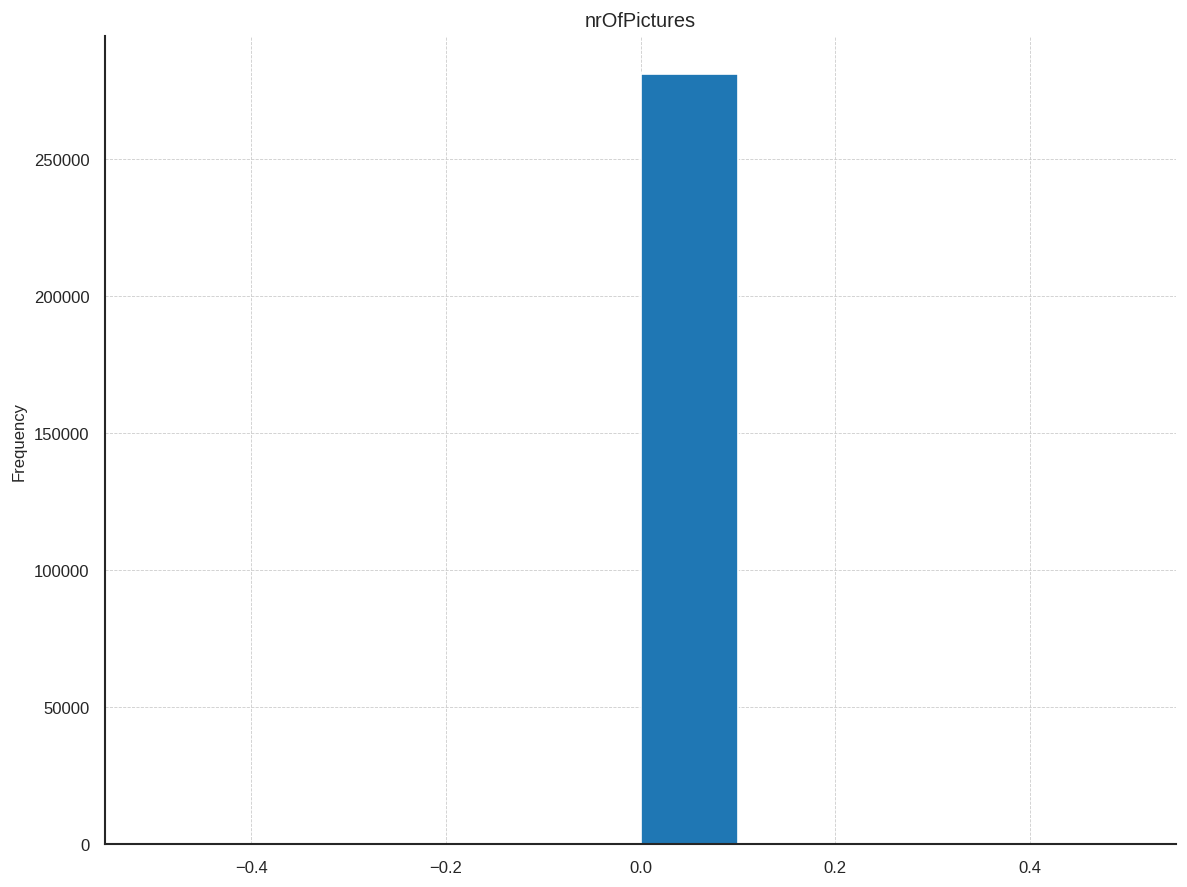

Summary:
count    280785.00000
mean     123072.45757
std       40366.20613
min        5000.00000
25%      100000.00000
50%      150000.00000
75%      150000.00000
max      150000.00000
Name: kilometer, dtype: float64


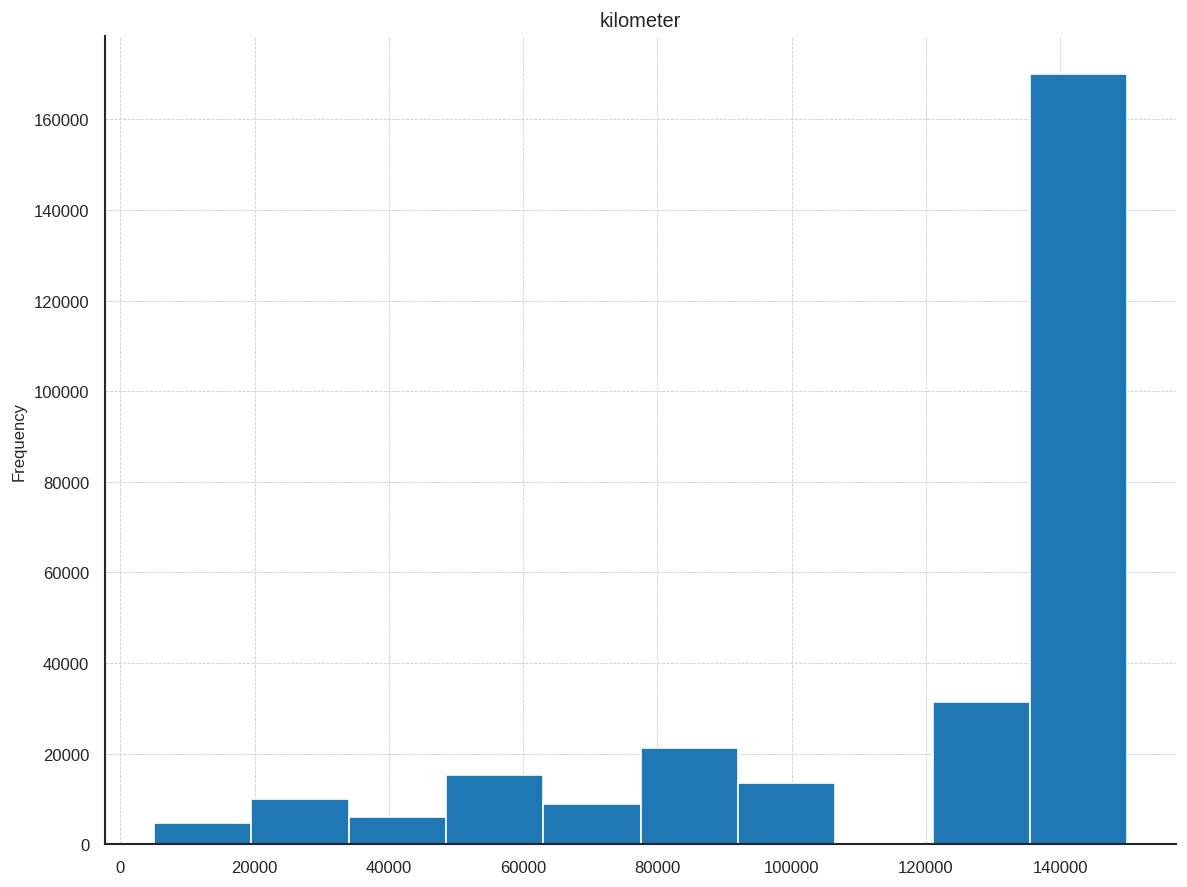

Summary:
count    280785.00000
mean        126.71923
std         193.51335
min           0.00000
25%          80.00000
50%         116.00000
75%         160.00000
max       20000.00000
Name: powerPS, dtype: float64


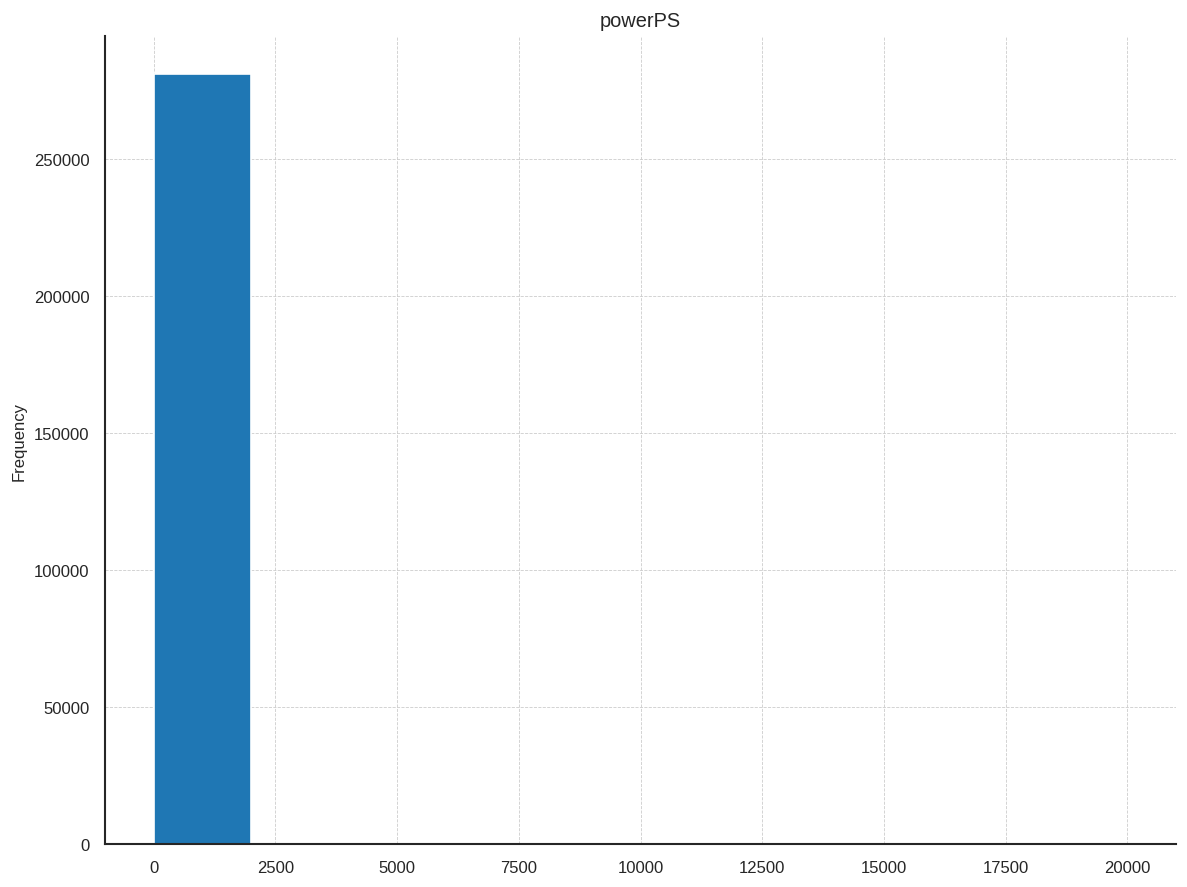

Summary:
count    280785.00000
mean       6779.65024
std        6502.26541
min        1001.00000
25%        2250.00000
50%        4400.00000
75%        8900.00000
max       39999.00000
Name: price, dtype: float64


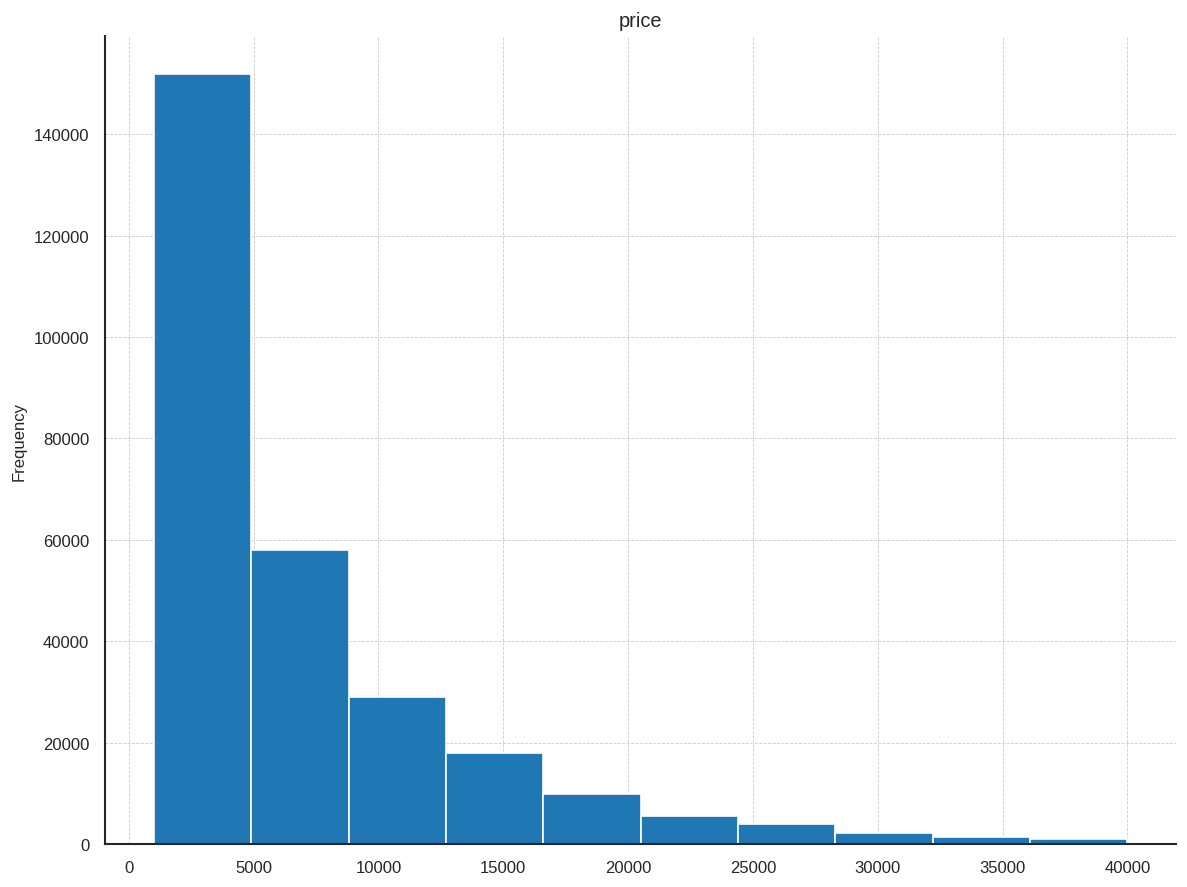

In [14]:
# Visualise data
cols_ = [
    "nrOfPictures",
    "kilometer",
    "powerPS",
    "price",
]

for col in cols_:
    print(f"Summary:\n{cars_df[col].describe().T}")
    cars_df[col].plot(kind = 'hist')
    plt.title(col)
    plt.savefig(f"../images/{col}_dist.png")
    plt.show()


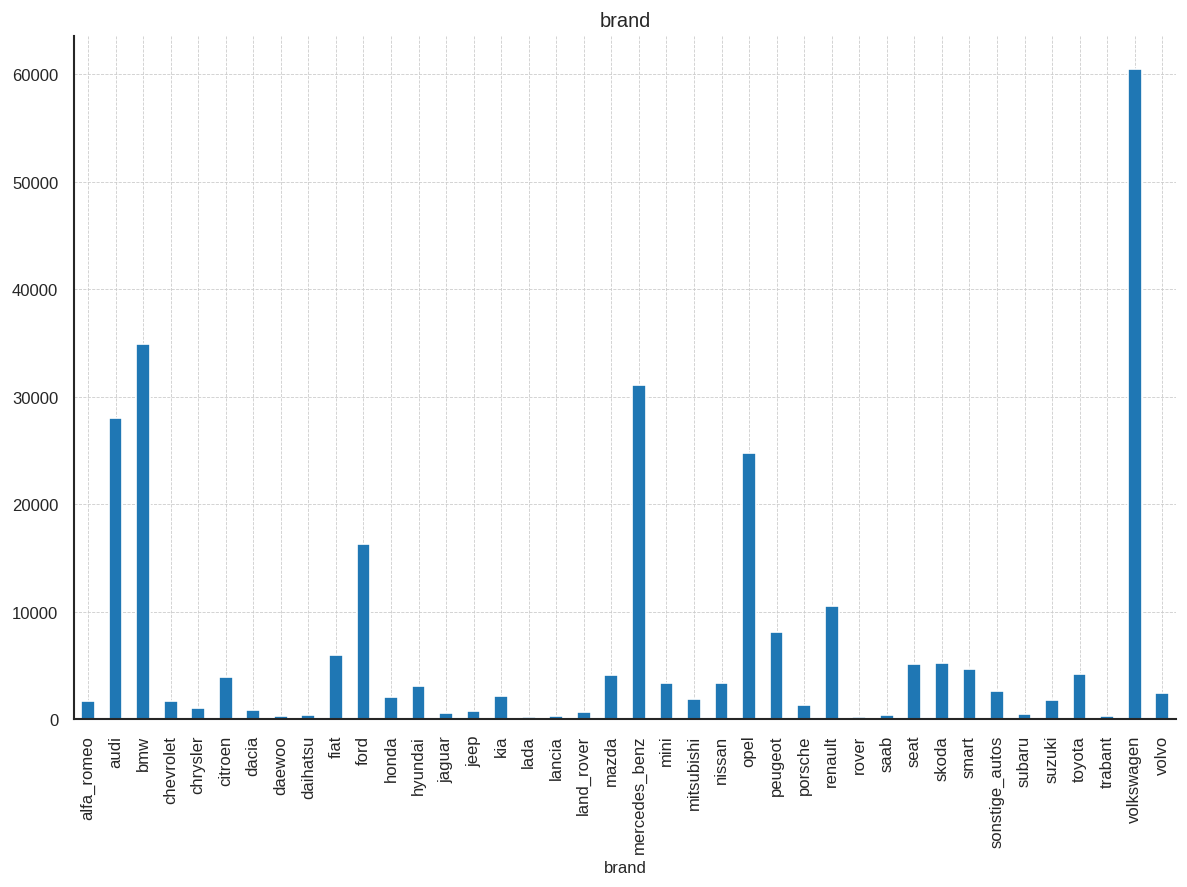

3     28084
6     26177
4     24203
5     24061
7     22909
10    22081
11    20801
9     20254
12    20115
8     18939
1     18899
2     17307
0     16955
Name: monthOfRegistration, dtype: int64


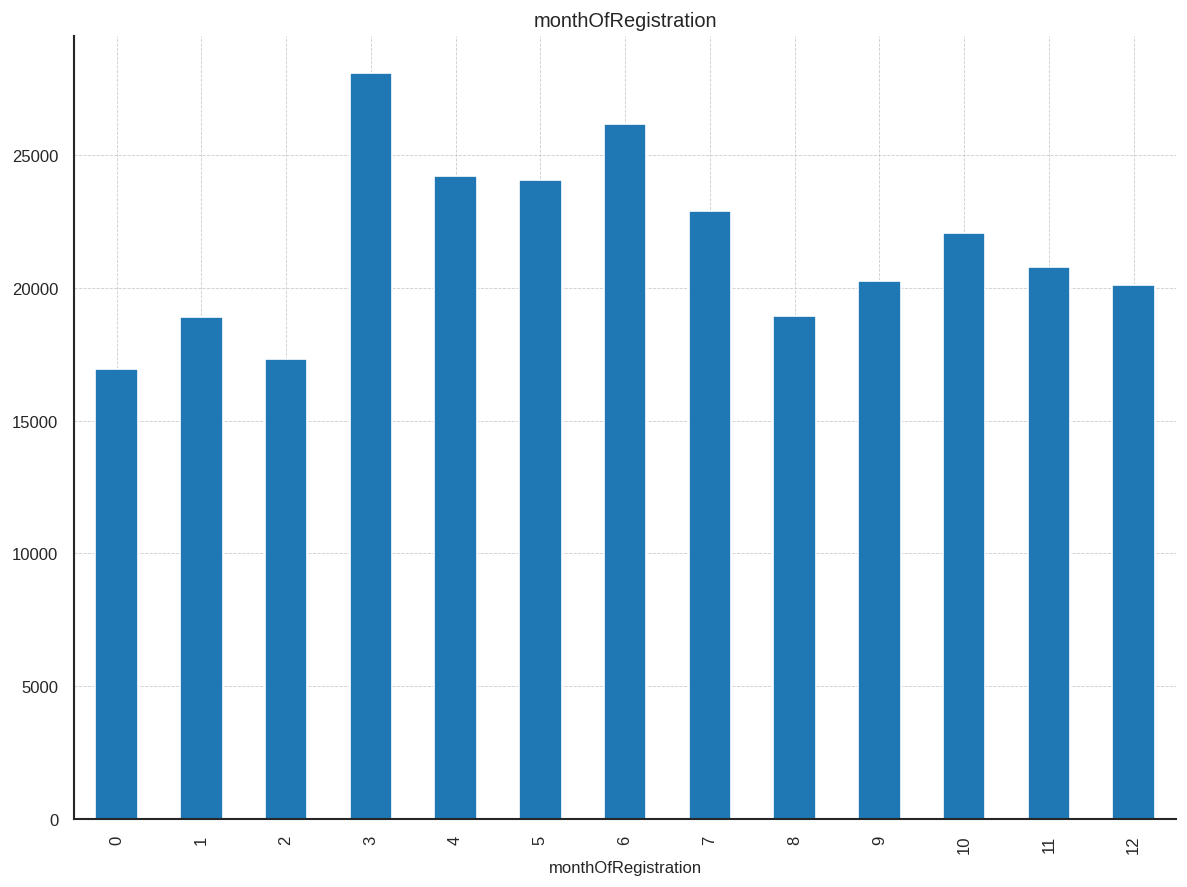

2005    20476
2006    19692
2004    18645
2003    17827
2007    17285
        ...  
8500        1
2500        1
3700        1
1001        1
7100        1
Name: yearOfRegistration, Length: 125, dtype: int64


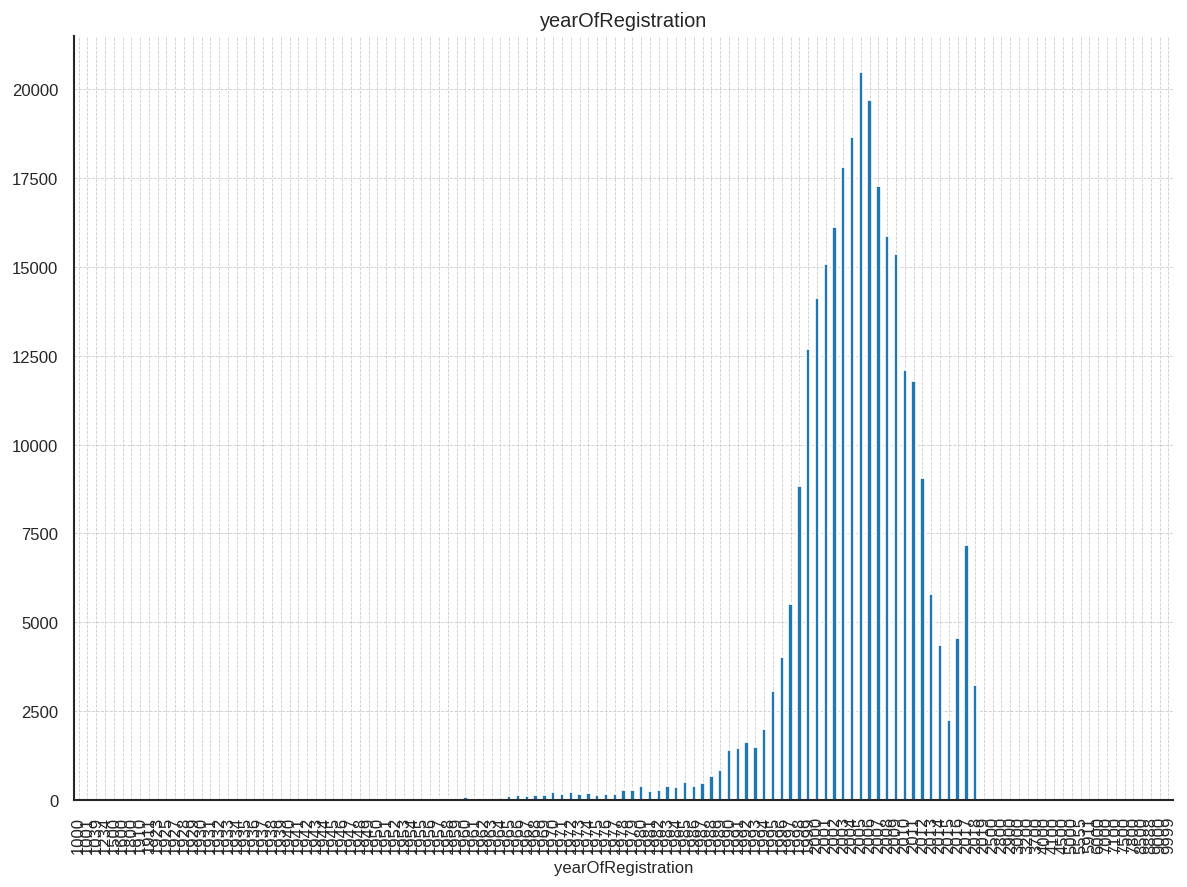

test       145493
control    135292
Name: abtest, dtype: int64


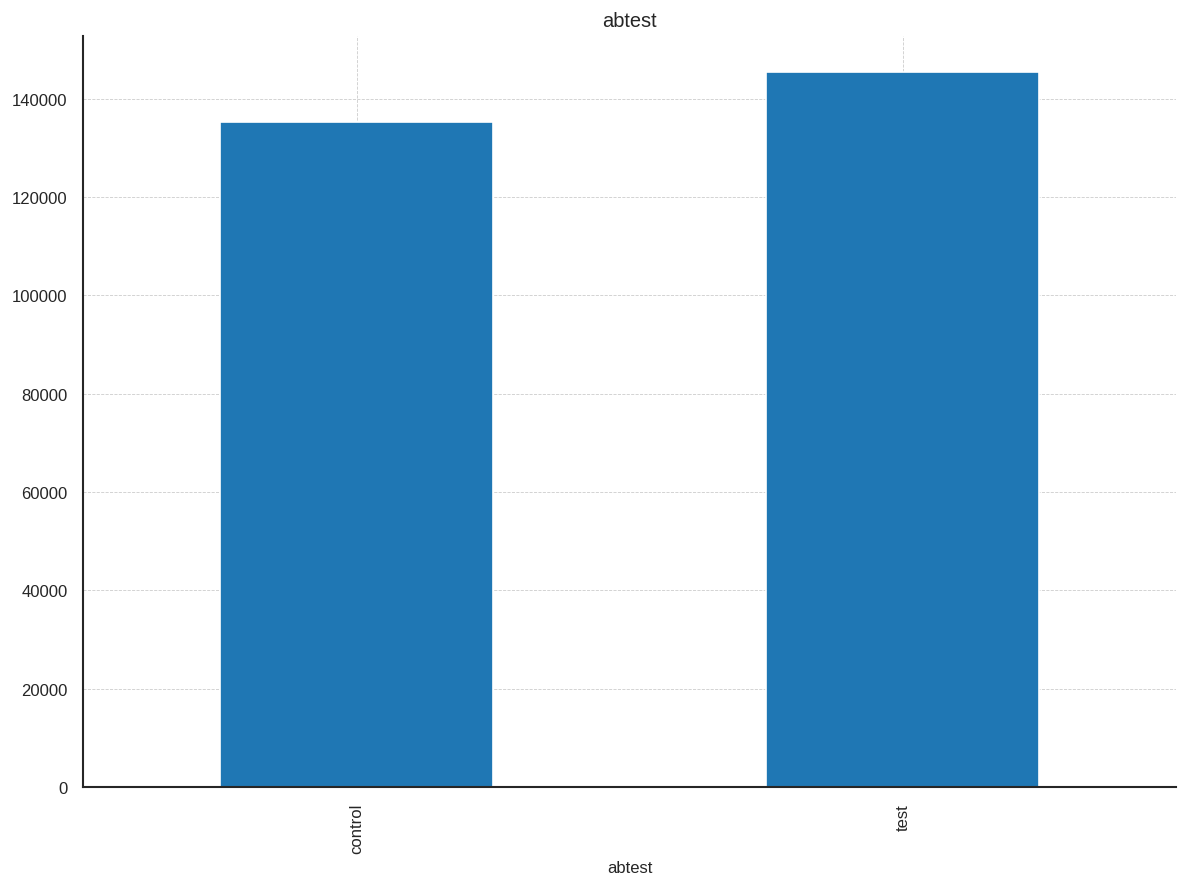

Angebot    280781
Gesuch          4
Name: offerType, dtype: int64


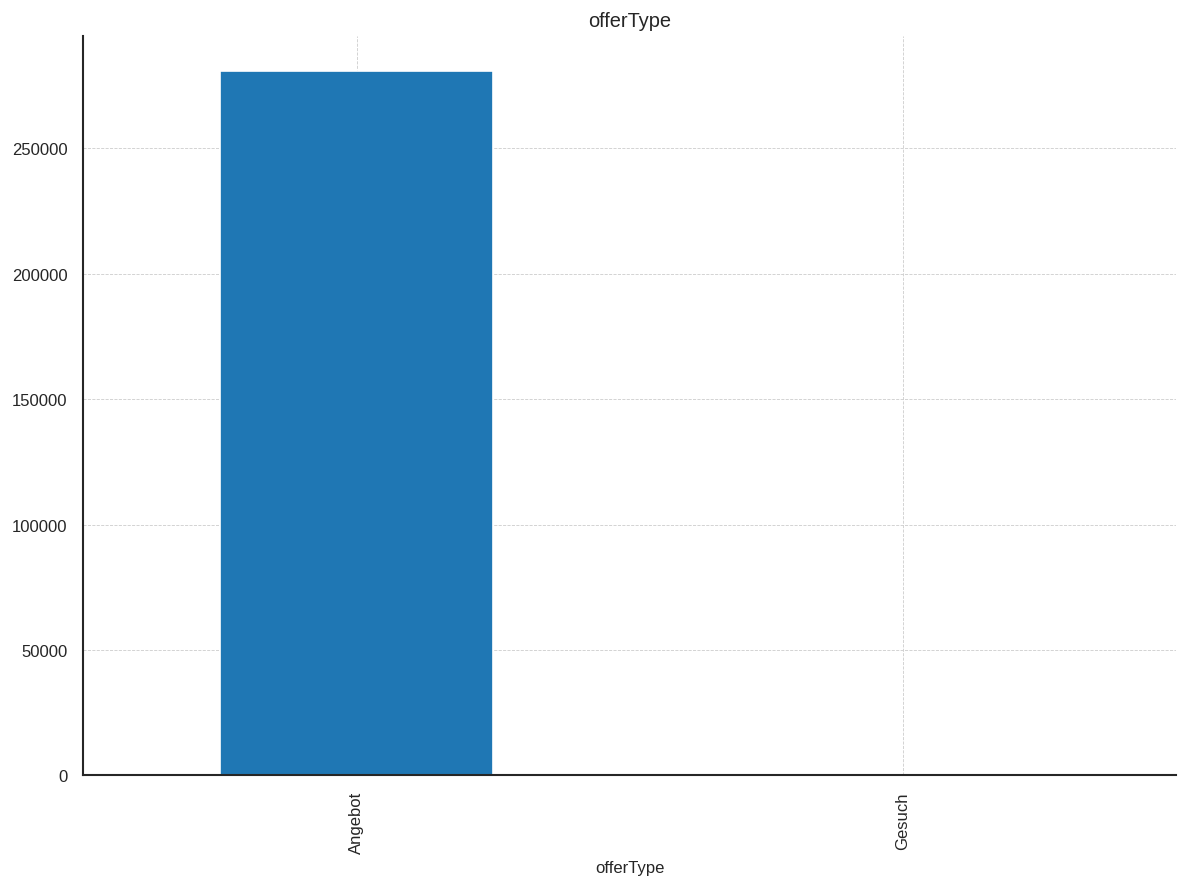

privat        280783
gewerblich         2
Name: seller, dtype: int64


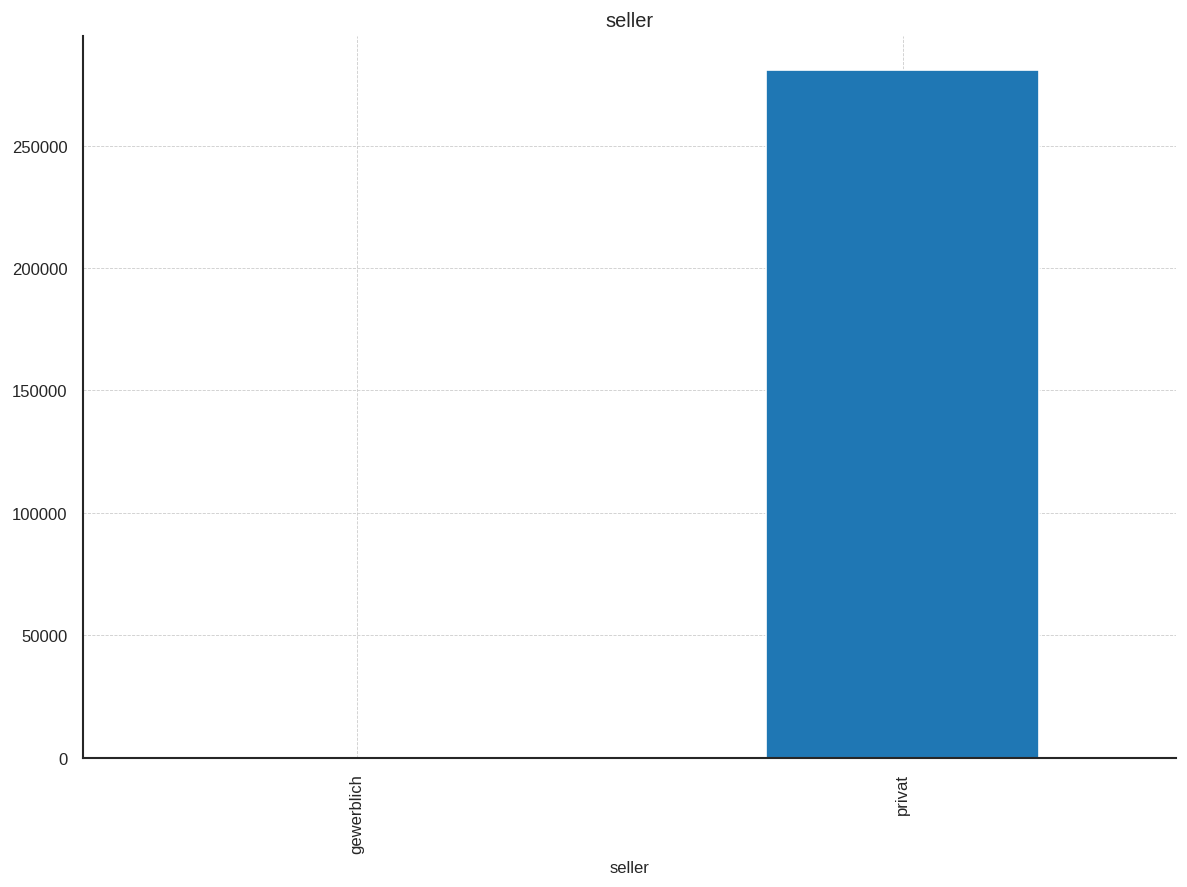

limousine     77082
kombi         54663
kleinwagen    50223
bus           27016
cabrio        20626
coupe         15249
suv           13733
andere         2341
Name: vehicleType, dtype: int64


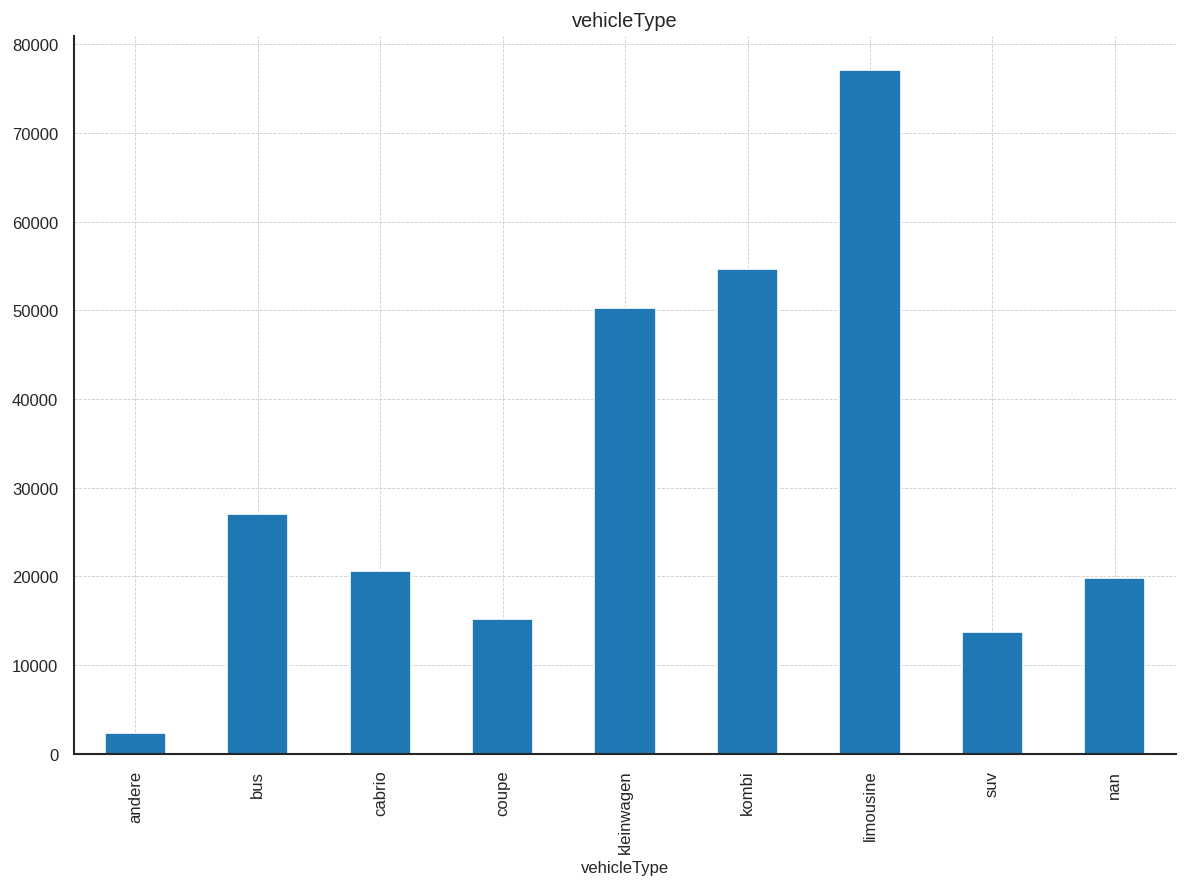

benzin     158659
diesel      99771
lpg          4487
cng           503
hybrid        249
andere         92
elektro        80
Name: fuelType, dtype: int64


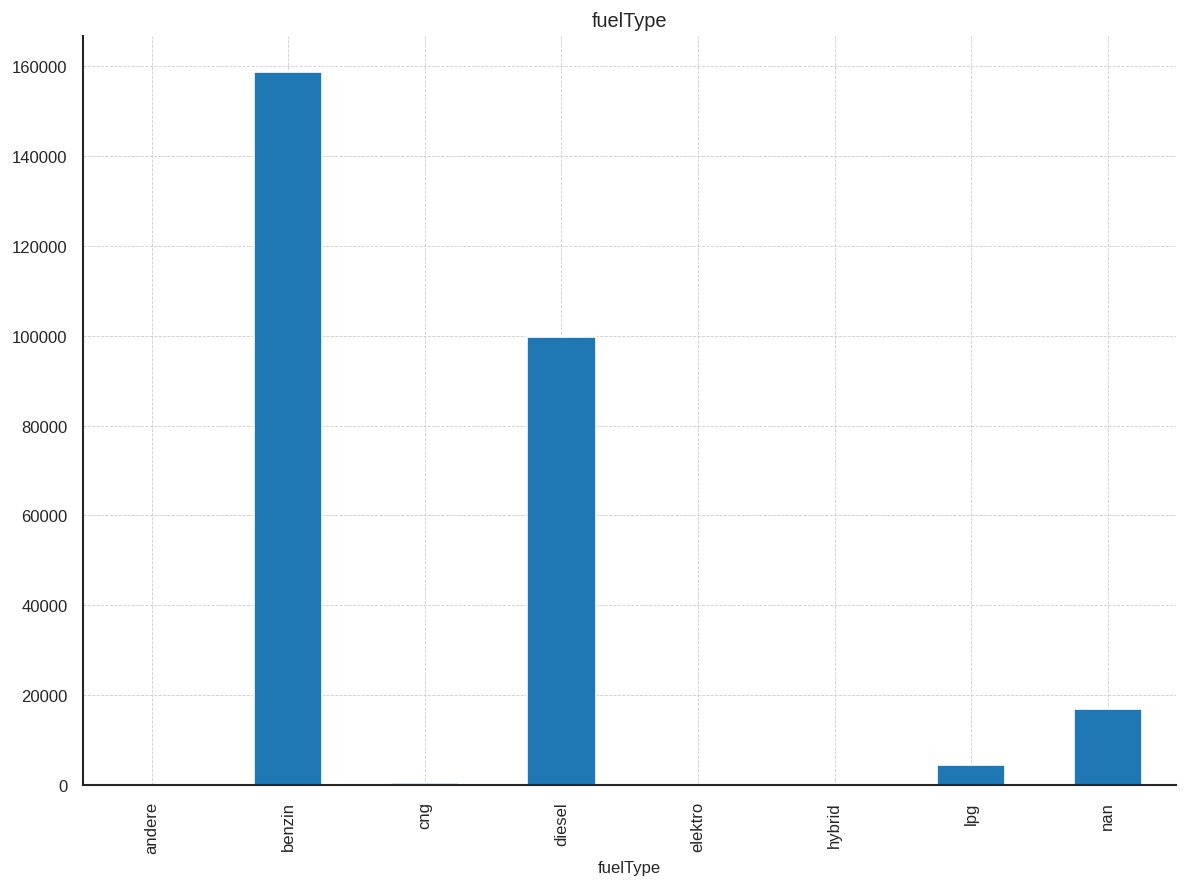

golf          22580
andere        19472
3er           17281
a4             8687
passat         8402
              ...  
samara            3
serie_3           3
charade           3
serie_1           1
elefantino        1
Name: model, Length: 250, dtype: int64


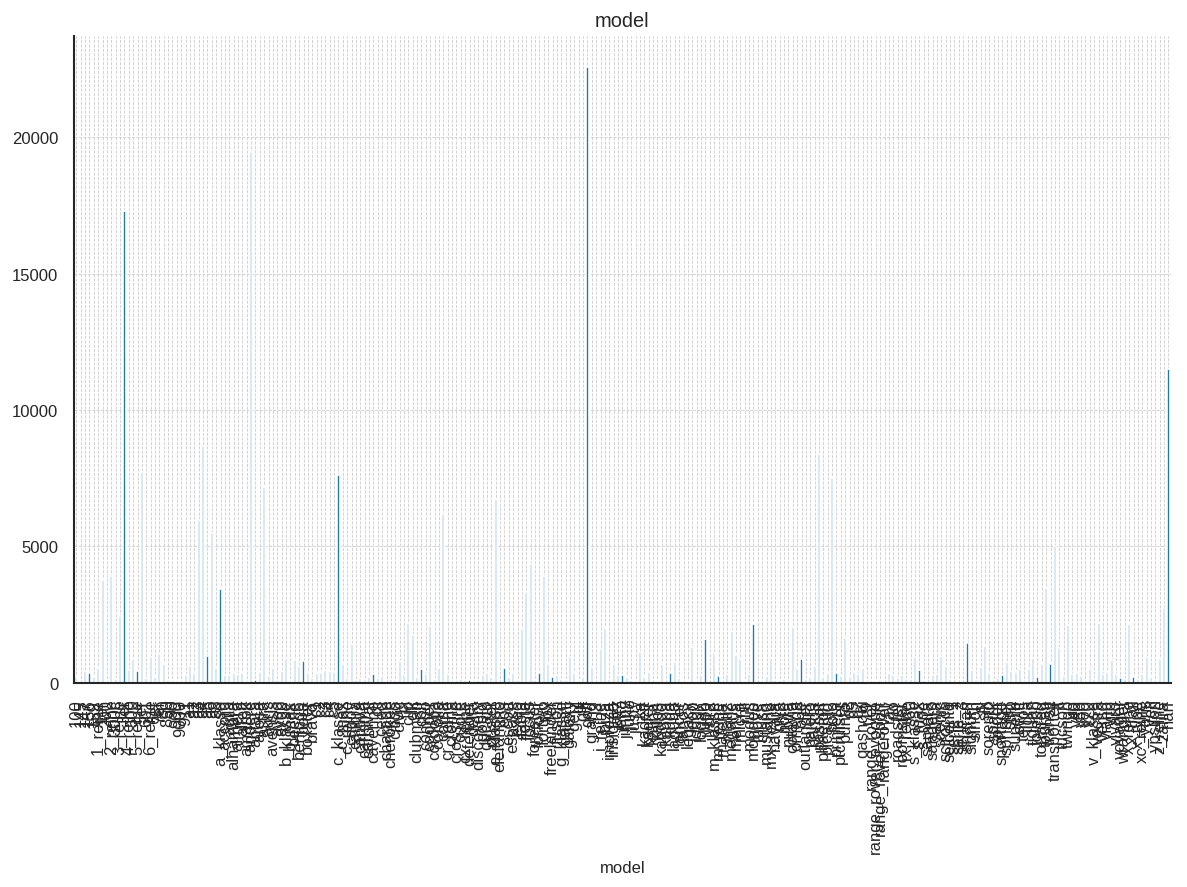

manuell      202936
automatik     67809
Name: gearbox, dtype: int64


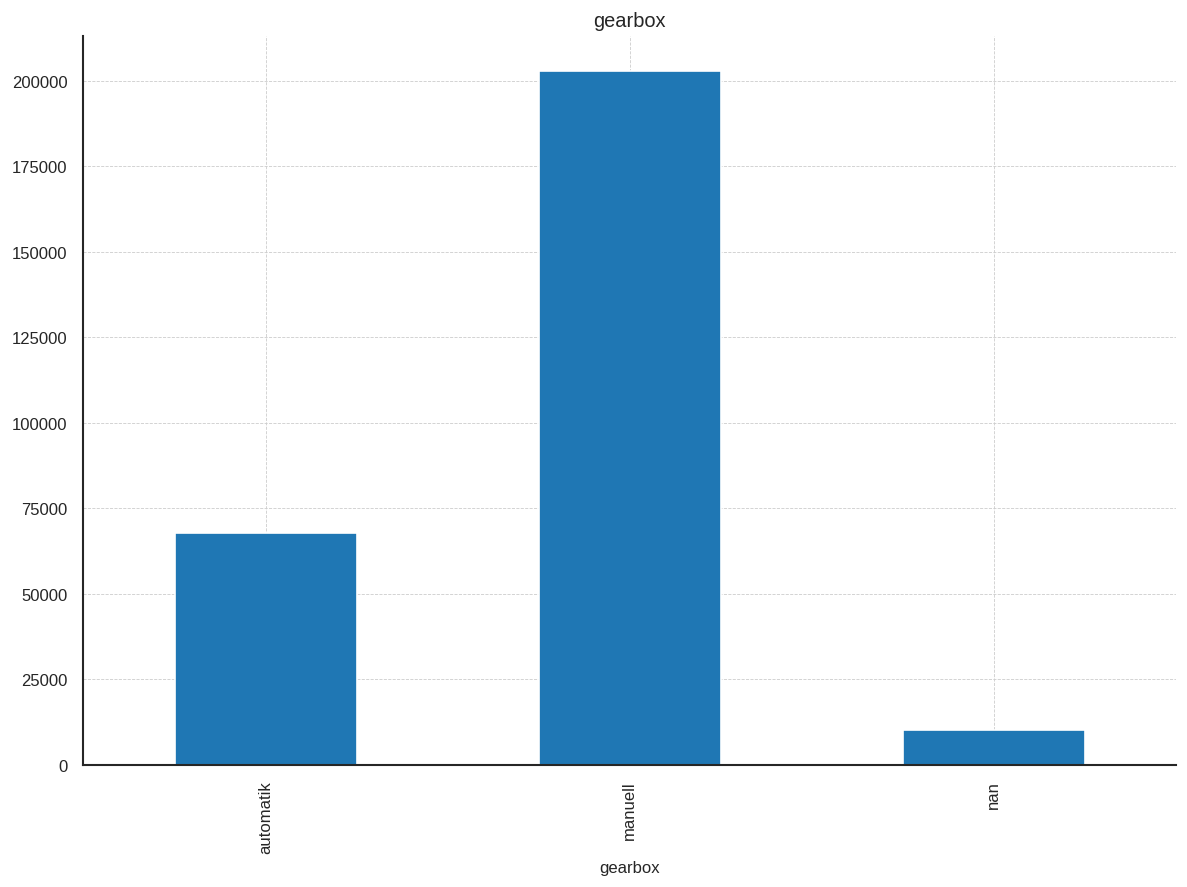

volkswagen        60536
bmw               34942
mercedes_benz     31059
audi              28034
opel              24746
ford              16283
renault           10507
peugeot            8075
fiat               5968
skoda              5187
seat               5140
smart              4697
toyota             4173
mazda              4111
citroen            3893
nissan             3377
mini               3327
hyundai            3067
sonstige_autos     2562
volvo              2411
kia                2139
honda              2033
mitsubishi         1847
suzuki             1733
alfa_romeo         1711
chevrolet          1659
porsche            1277
chrysler           1036
dacia               870
jeep                746
land_rover          694
jaguar              547
subaru              486
saab                393
daihatsu            377
trabant             264
lancia              250
daewoo              240
rover               212
lada                176
Name: brand, dtype: int64


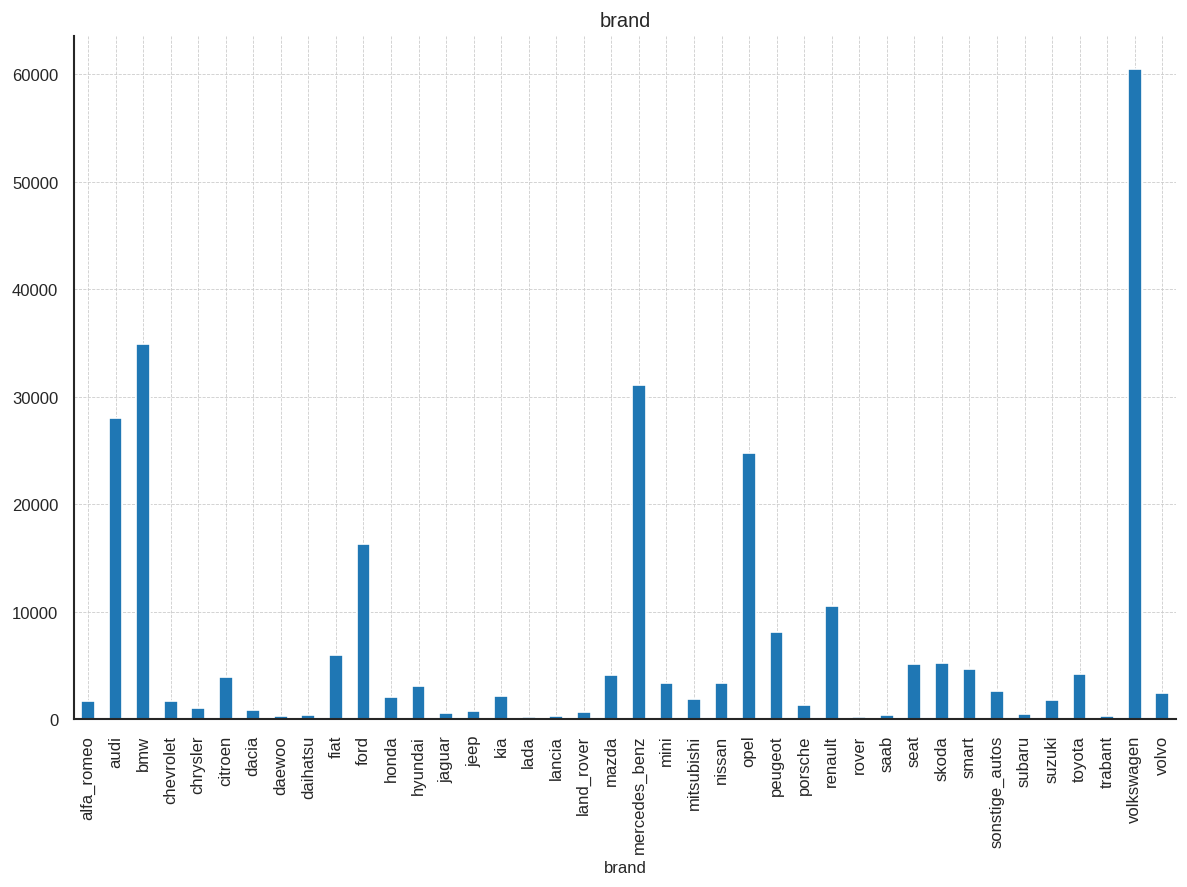

3     28084
6     26177
4     24203
5     24061
7     22909
10    22081
11    20801
9     20254
12    20115
8     18939
1     18899
2     17307
0     16955
Name: monthOfRegistration, dtype: int64


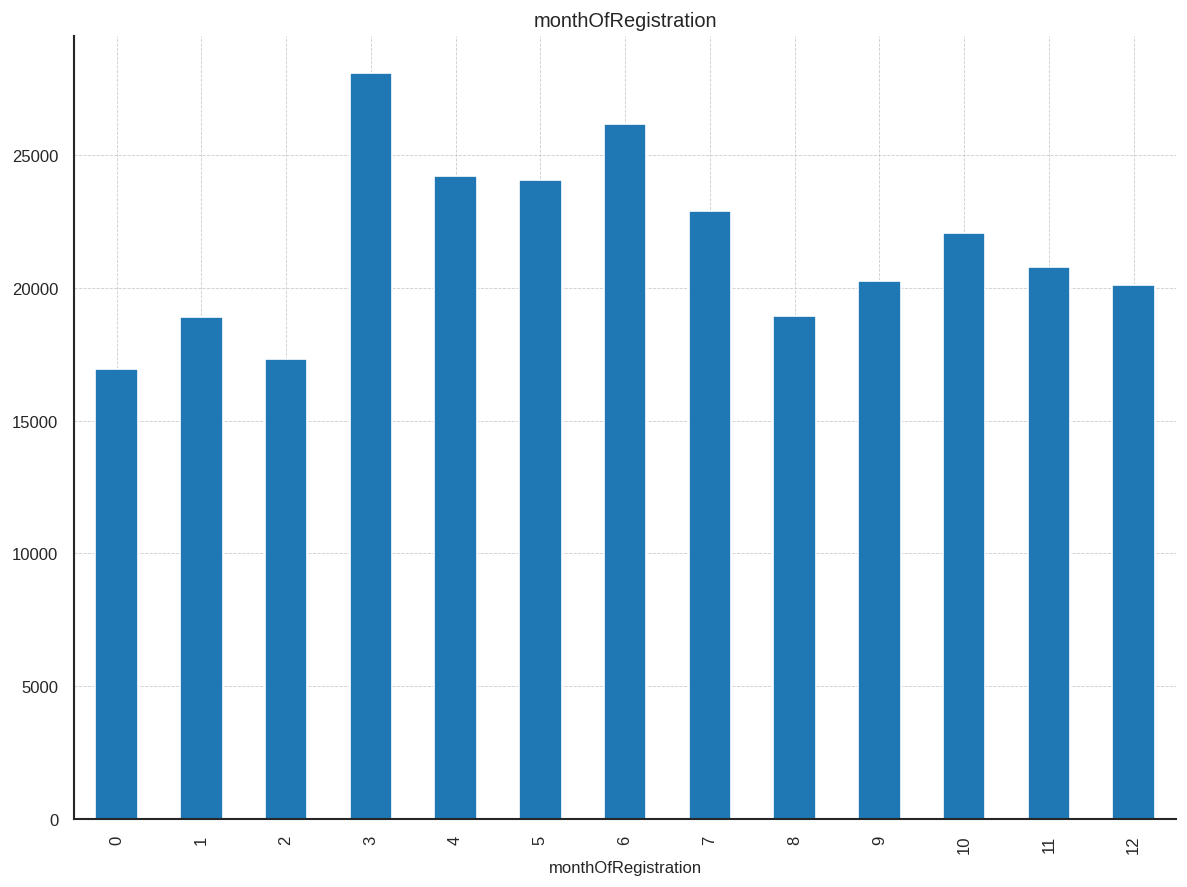

2005    20476
2006    19692
2004    18645
2003    17827
2007    17285
        ...  
8500        1
2500        1
3700        1
1001        1
7100        1
Name: yearOfRegistration, Length: 125, dtype: int64


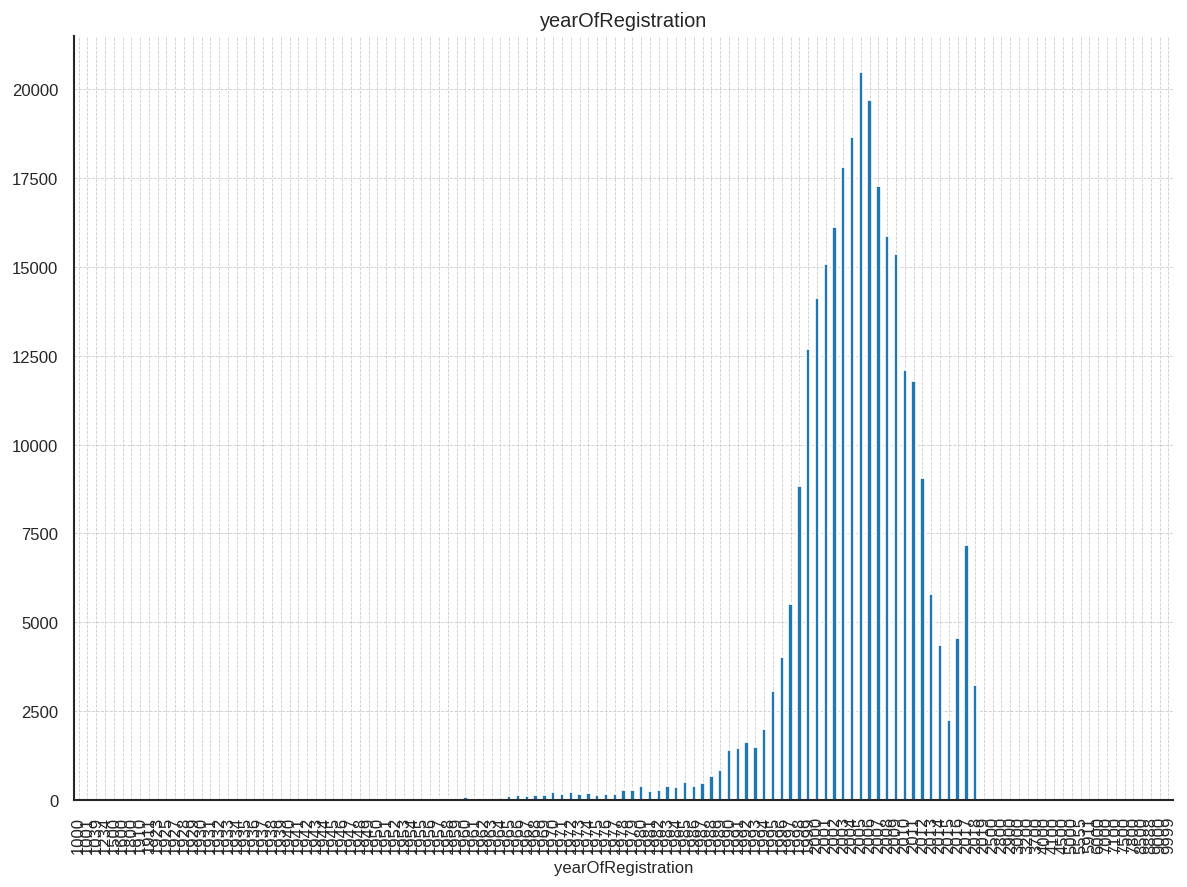

test       145493
control    135292
Name: abtest, dtype: int64


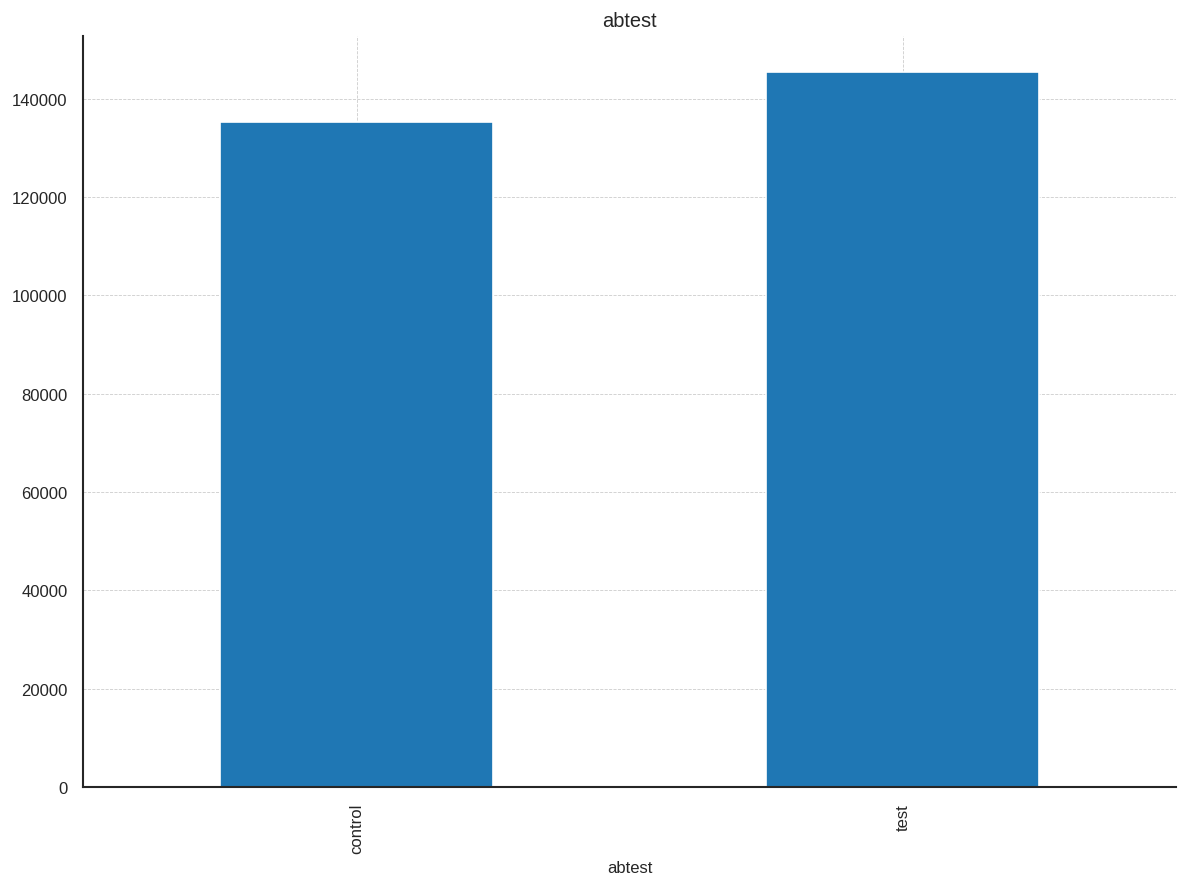

Angebot    280781
Gesuch          4
Name: offerType, dtype: int64


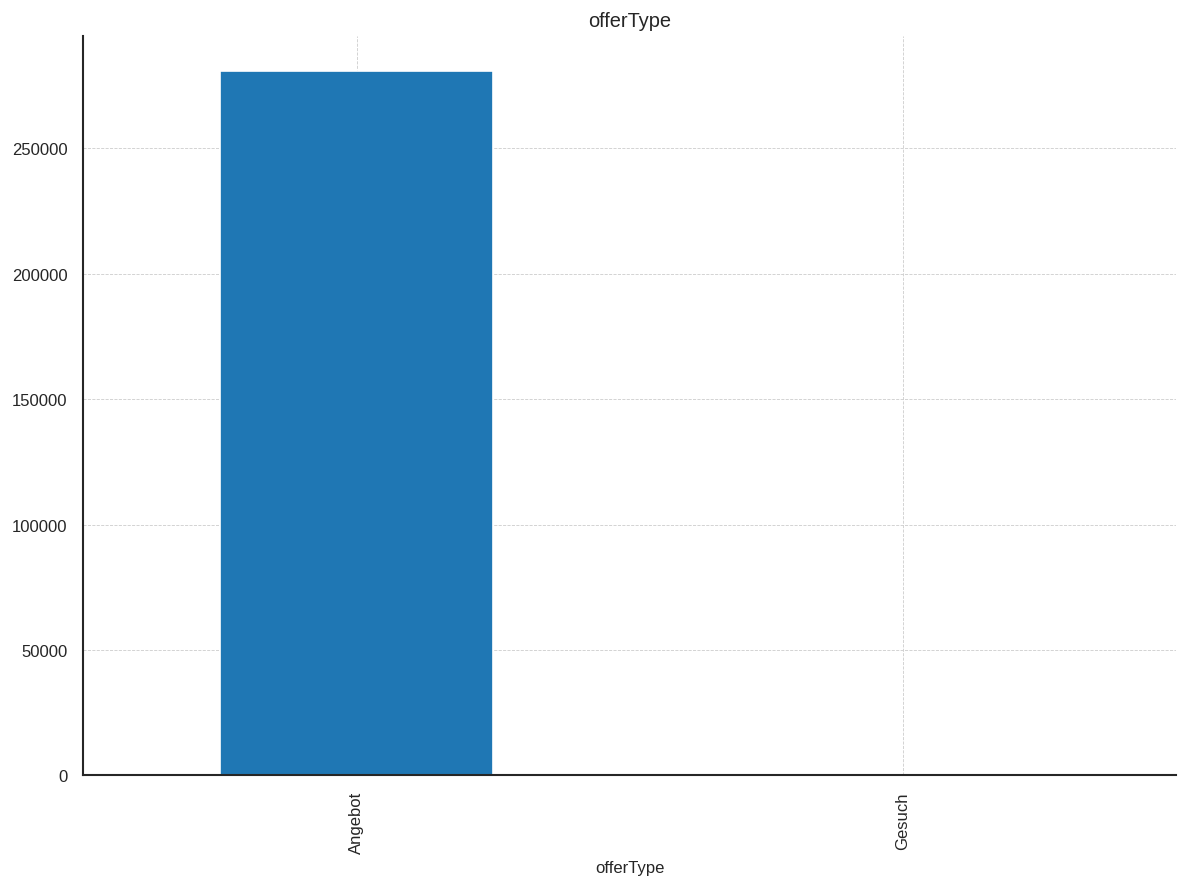

privat        280783
gewerblich         2
Name: seller, dtype: int64


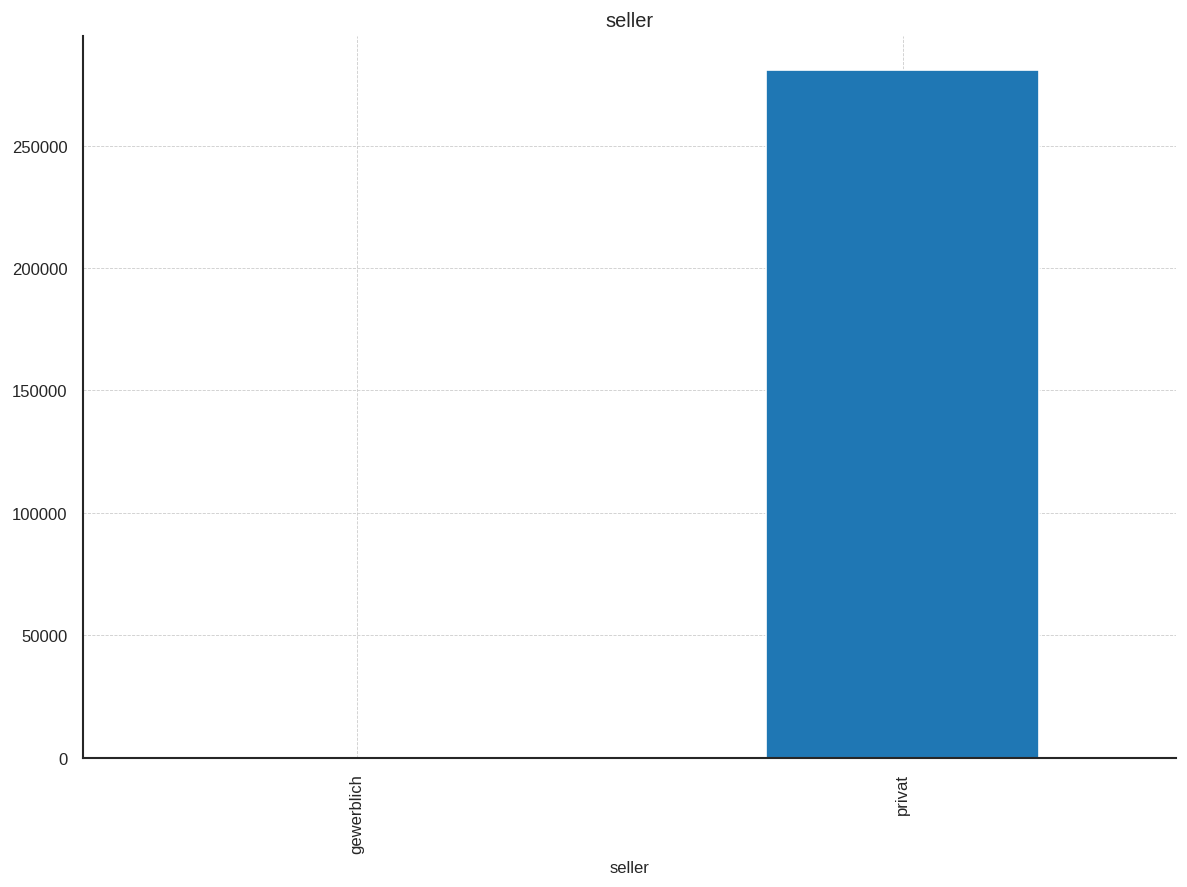

In [15]:
# Visualise data
cols_ = [
    "vehicleType",
    "fuelType",
    "model",
    "gearbox",
    "brand",
    "monthOfRegistration",
    "yearOfRegistration",
    "abtest",
    "offerType",
    "seller",
]

for col in cols_:
    print(cars_df[col].value_counts())
    cars_df.groupby(col, dropna = False).count()['index'].plot(kind = 'bar')
    plt.title(col)
    plt.savefig(f"../images/{col}_value_counts")
    plt.show()


In [16]:
# Correlation matrix

cars_df.corr(numeric_only = True)['price'].sort_values()


kilometer             -0.43433
index                 -0.00508
monthOfRegistration    0.03911
yearOfRegistration     0.04582
postalCode             0.07804
powerPS                0.16756
price                  1.00000
nrOfPictures               NaN
Name: price, dtype: float64

kilometer             -0.43433
index                 -0.00508
monthOfRegistration    0.03911
yearOfRegistration     0.04582
postalCode             0.07804
powerPS                0.16756
price                  1.00000
nrOfPictures               NaN
Name: price, dtype: float64

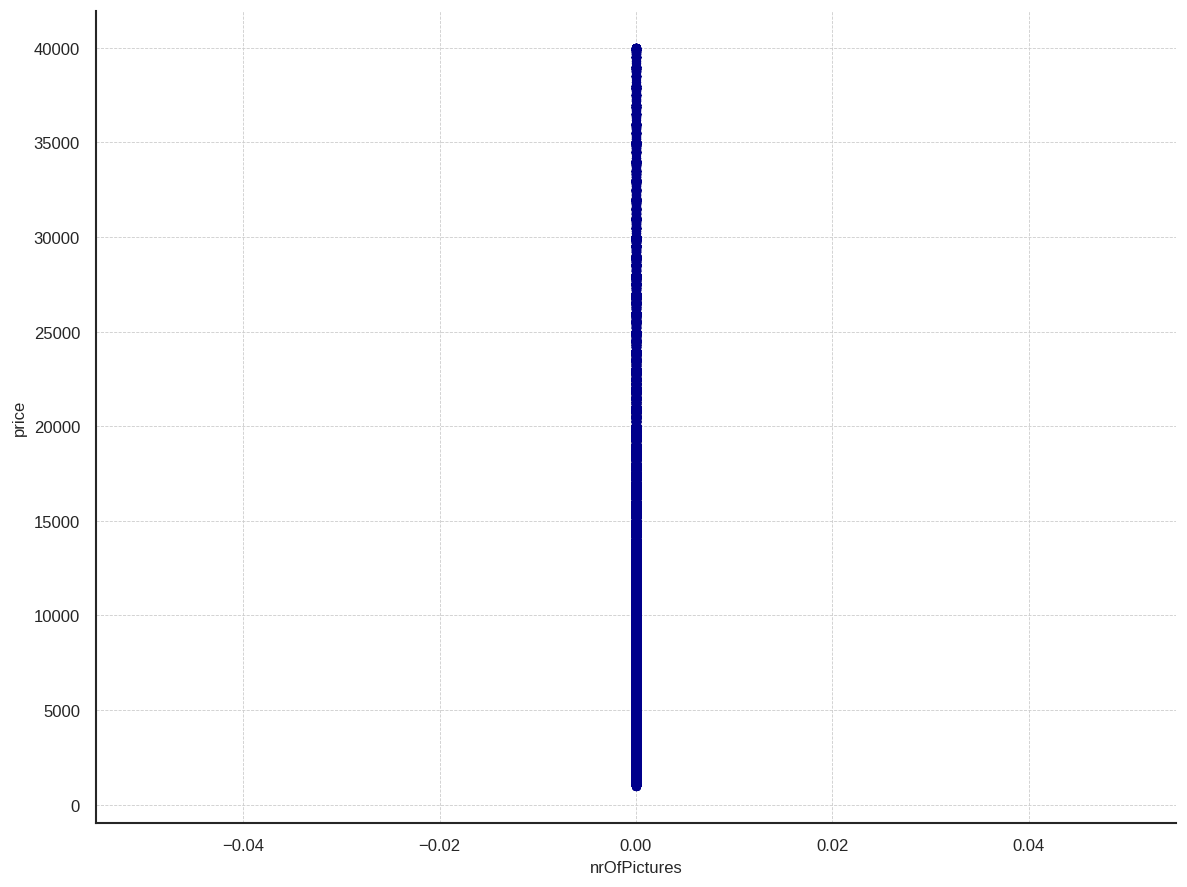

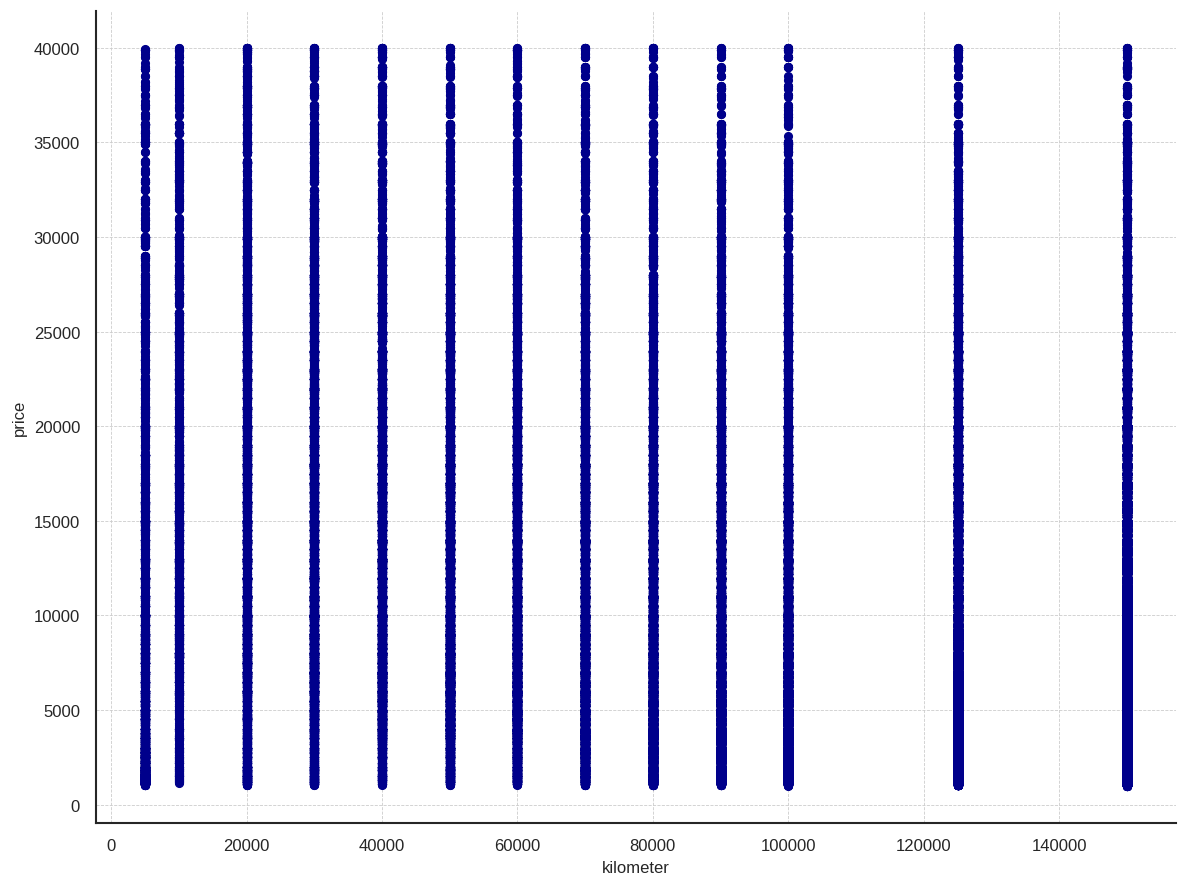

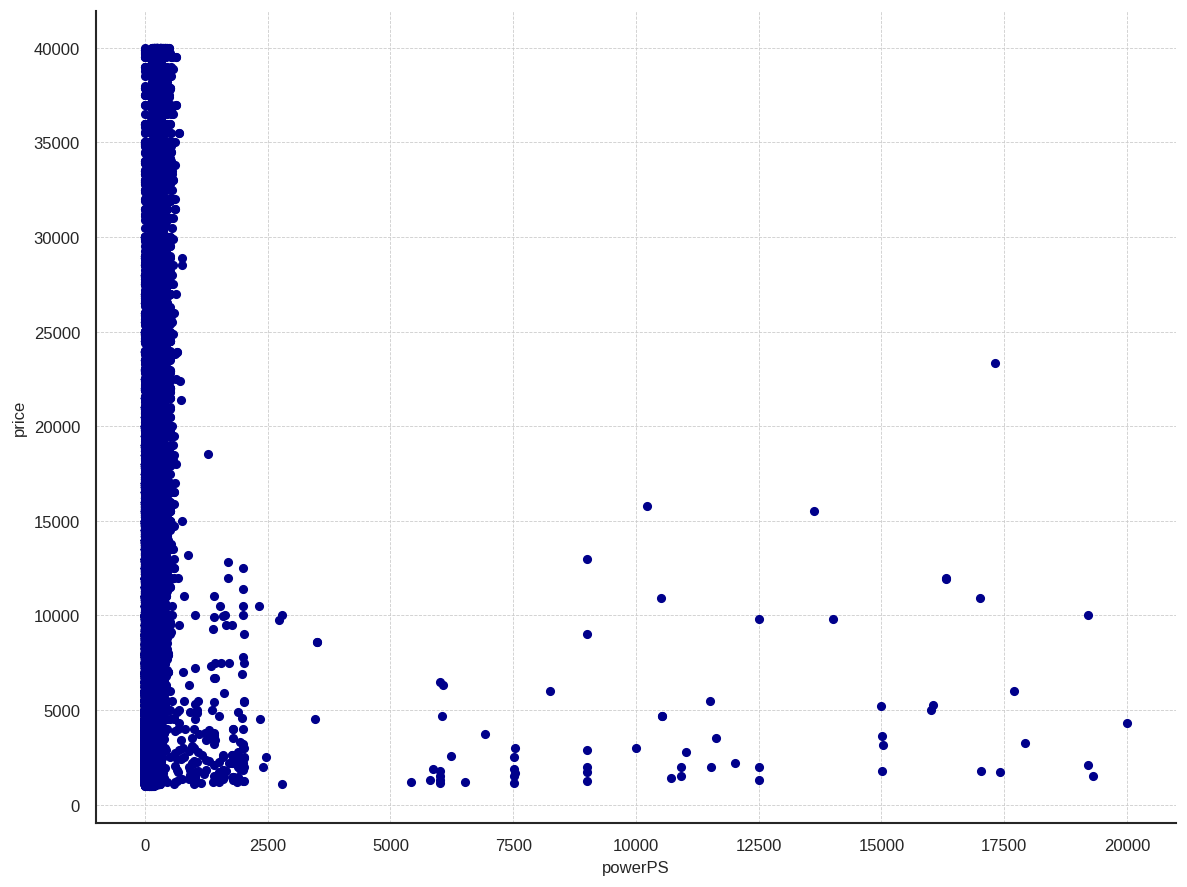

In [20]:
# Scatter plots
cols_ = [
    "nrOfPictures",
    "kilometer",
    "powerPS",
]

for col in cols_:
    cars_df.plot.scatter(x=col, y='price', c='DarkBlue')
    plt.savefig(f"../images/{col}_vs_price.png")
    plt.show()


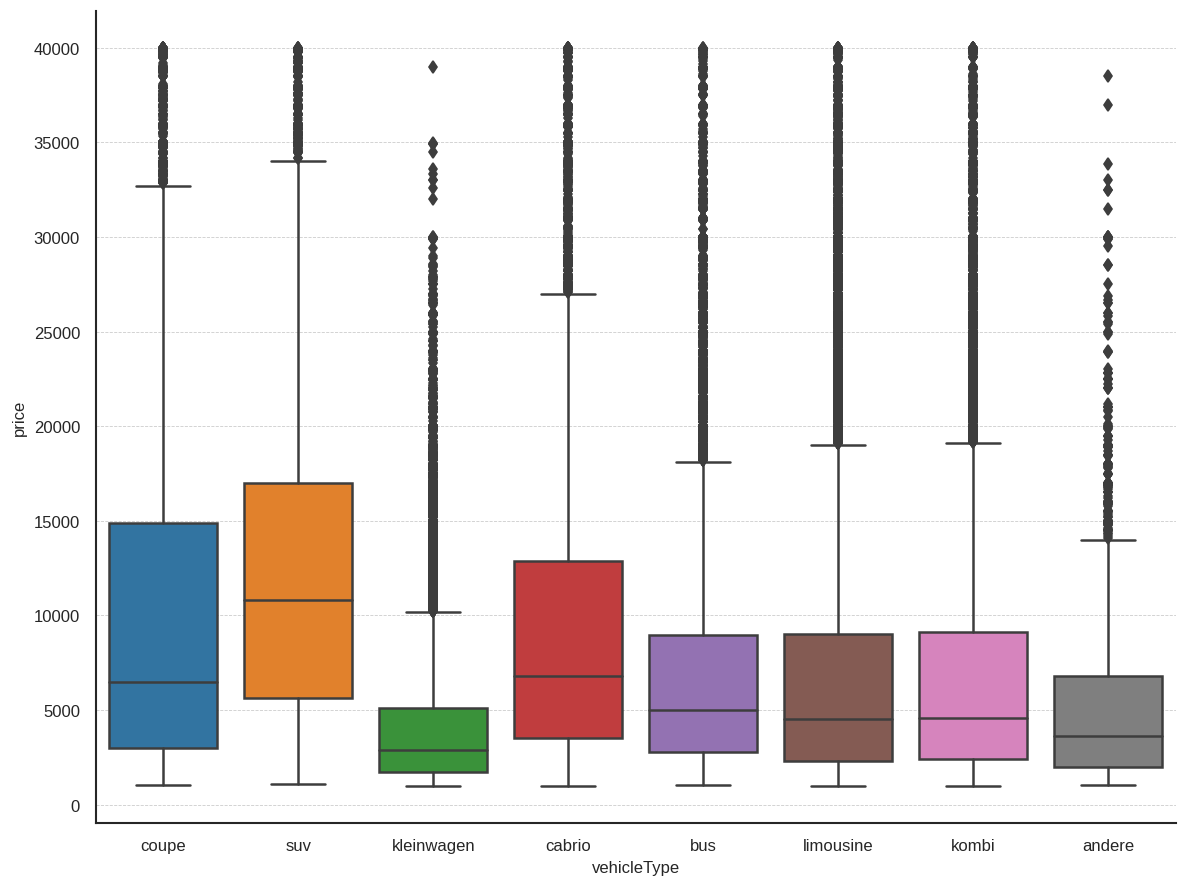

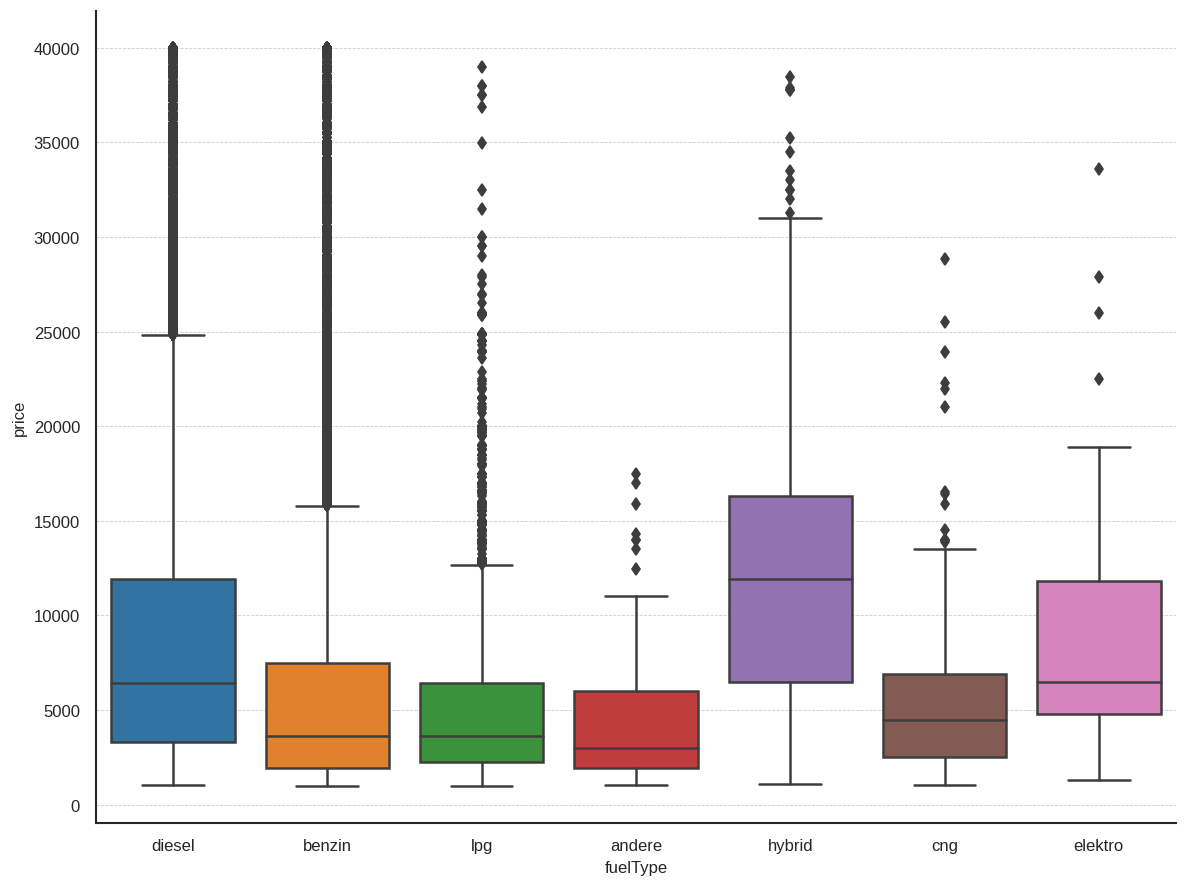

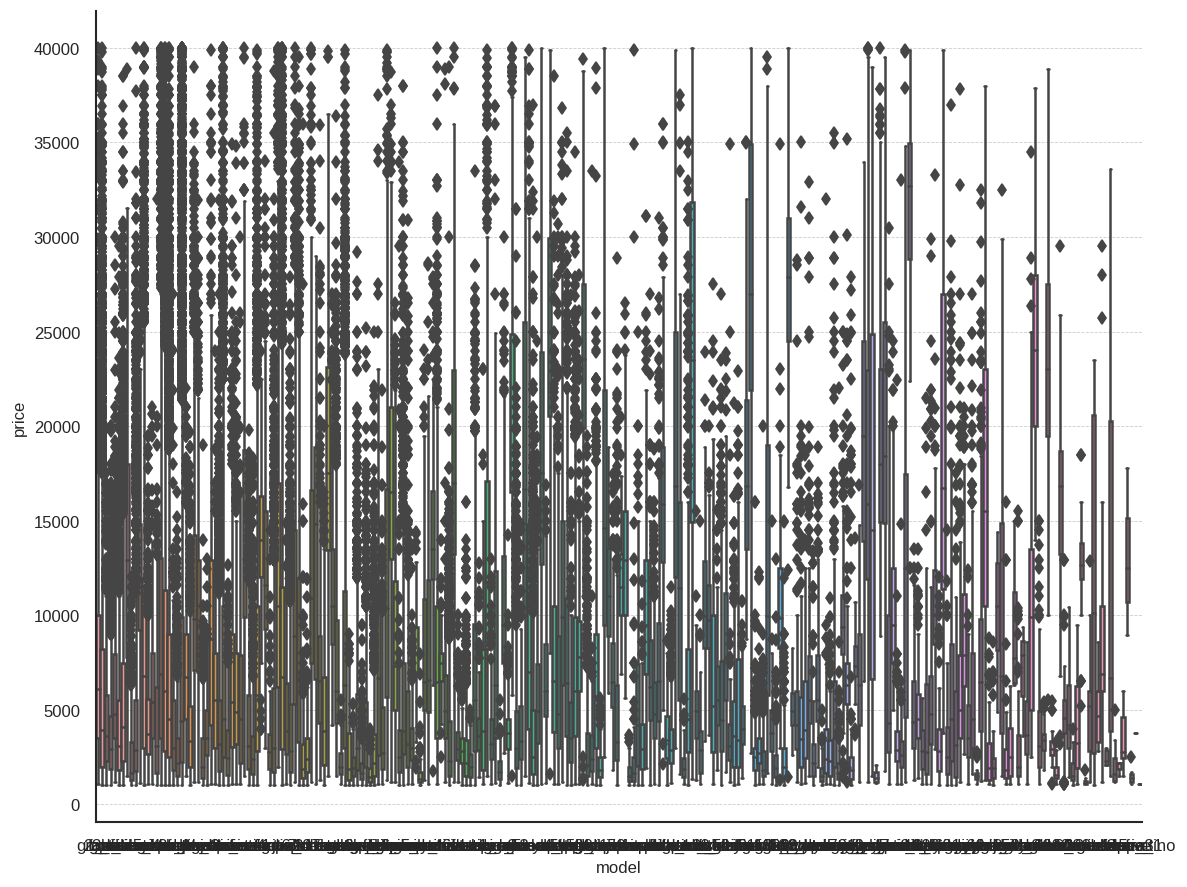

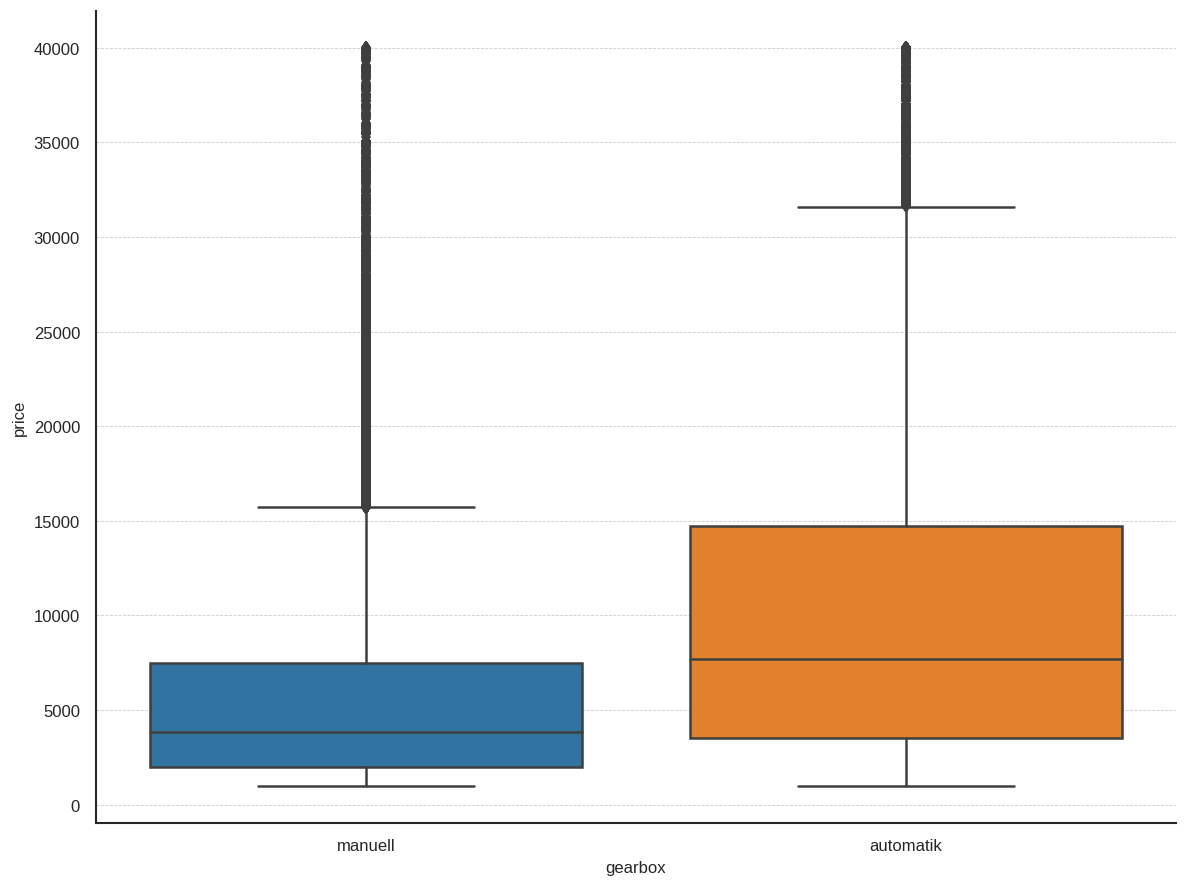

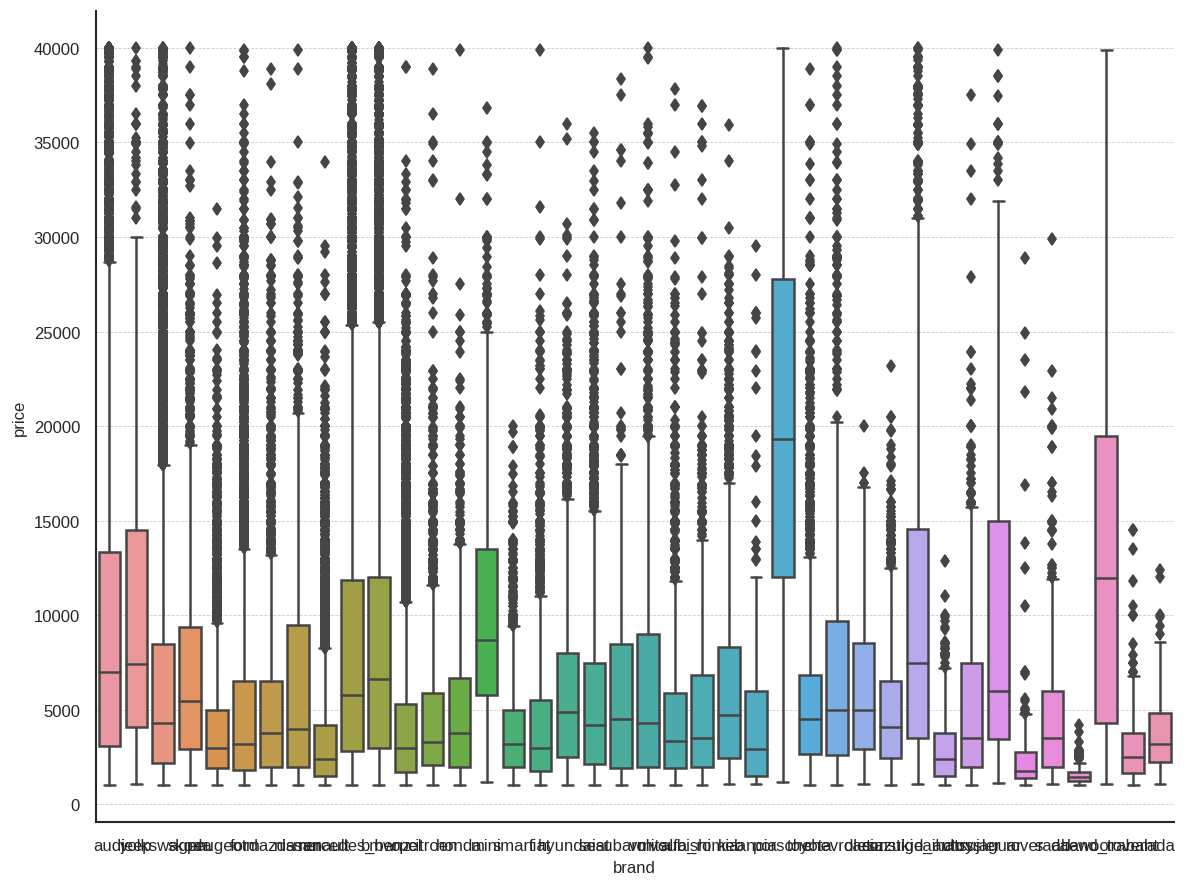

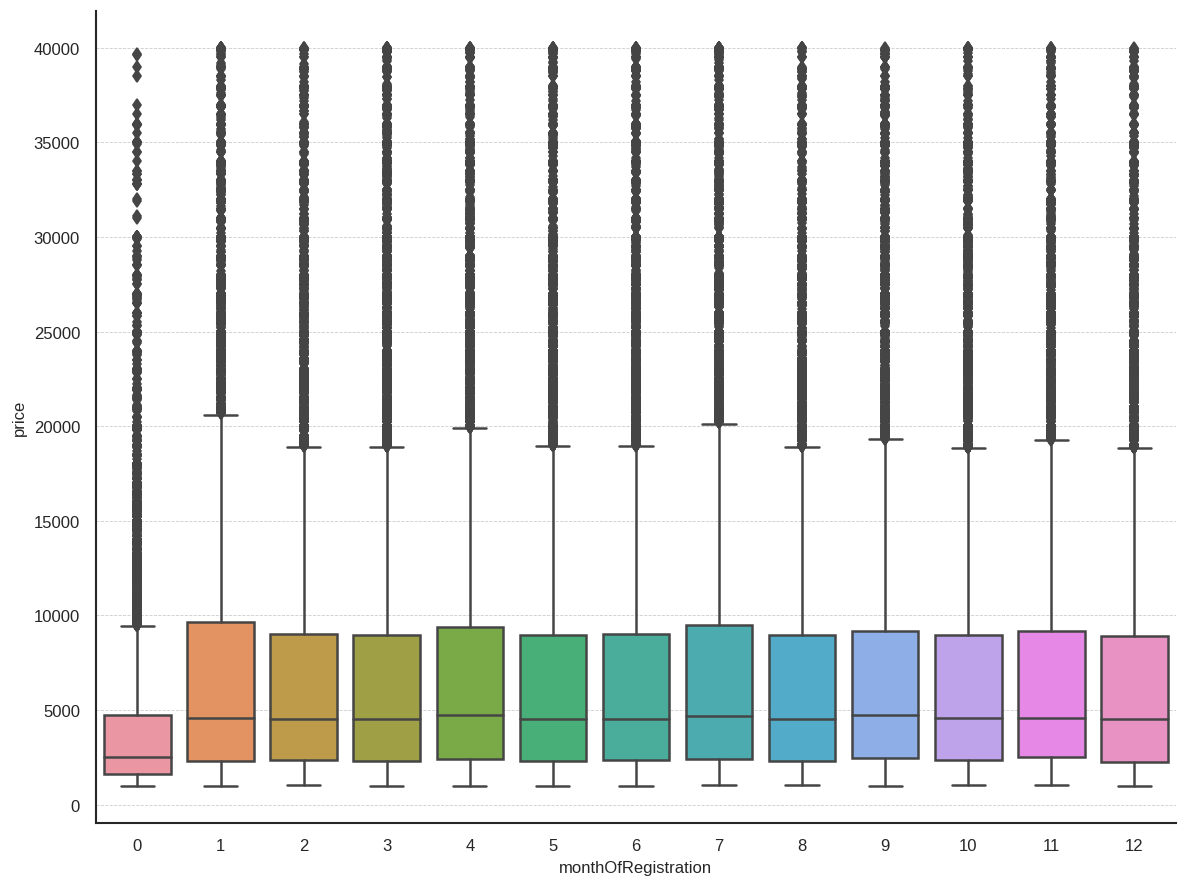

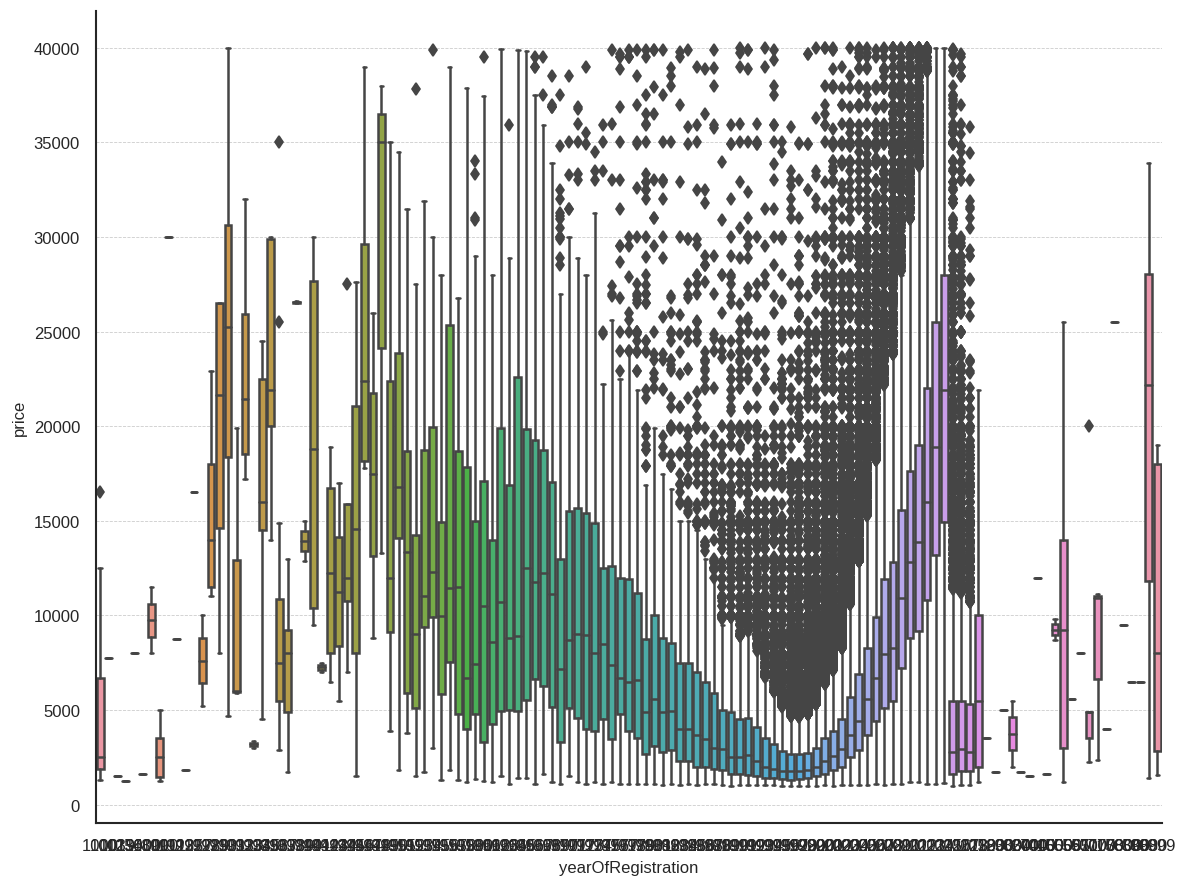

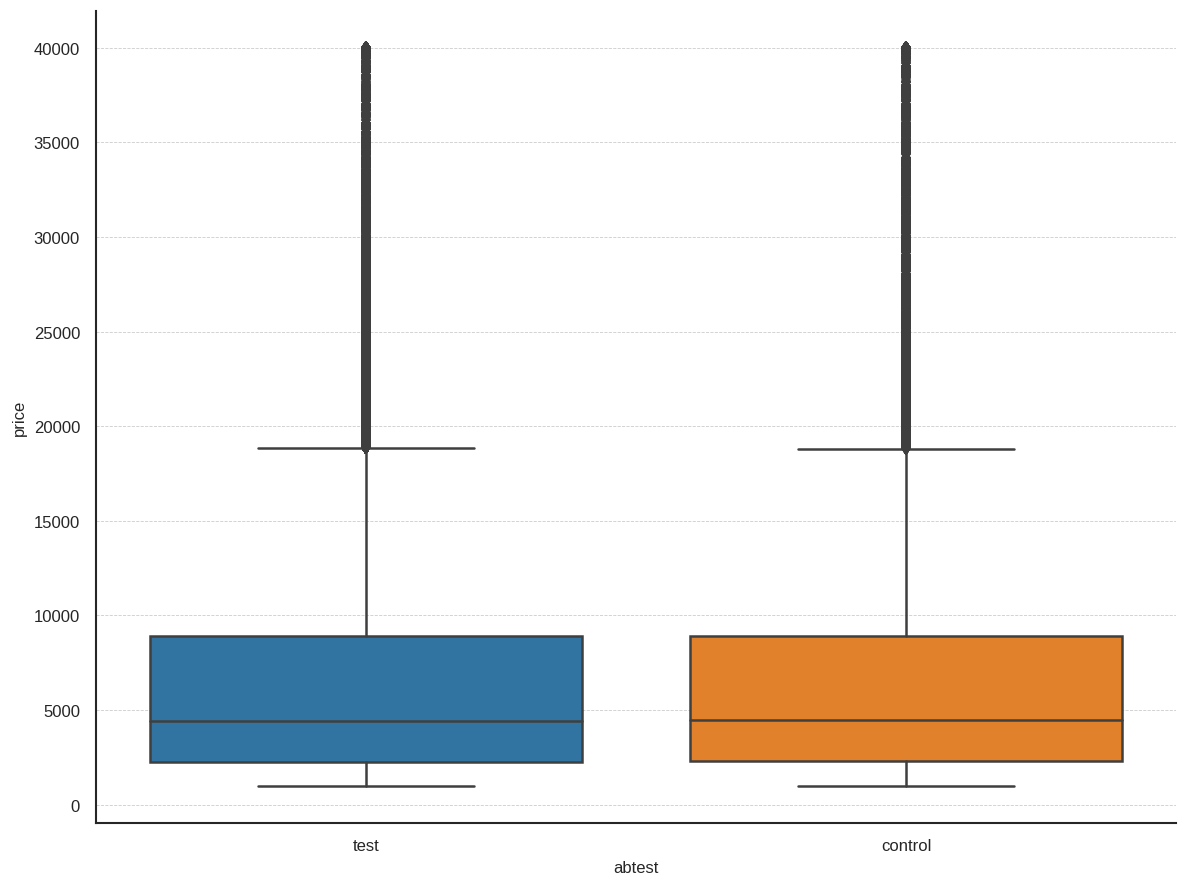

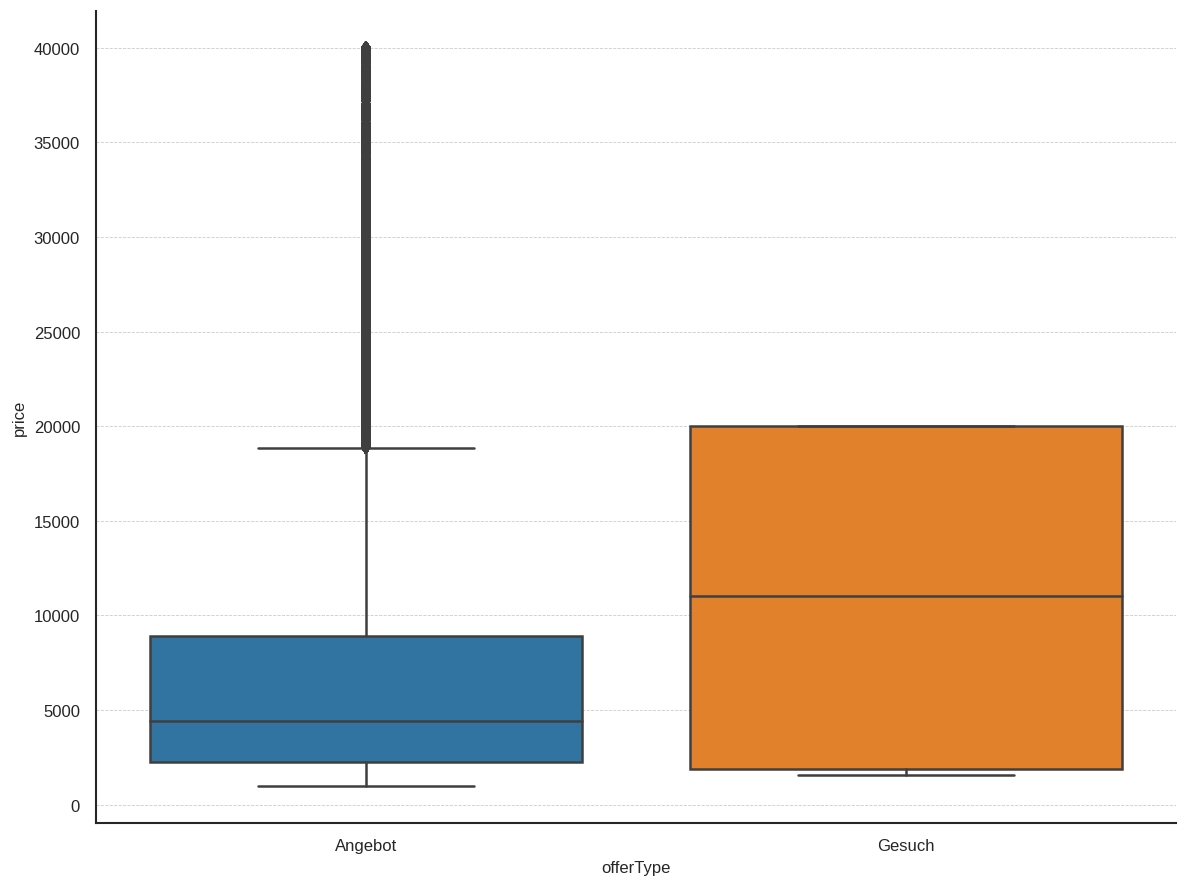

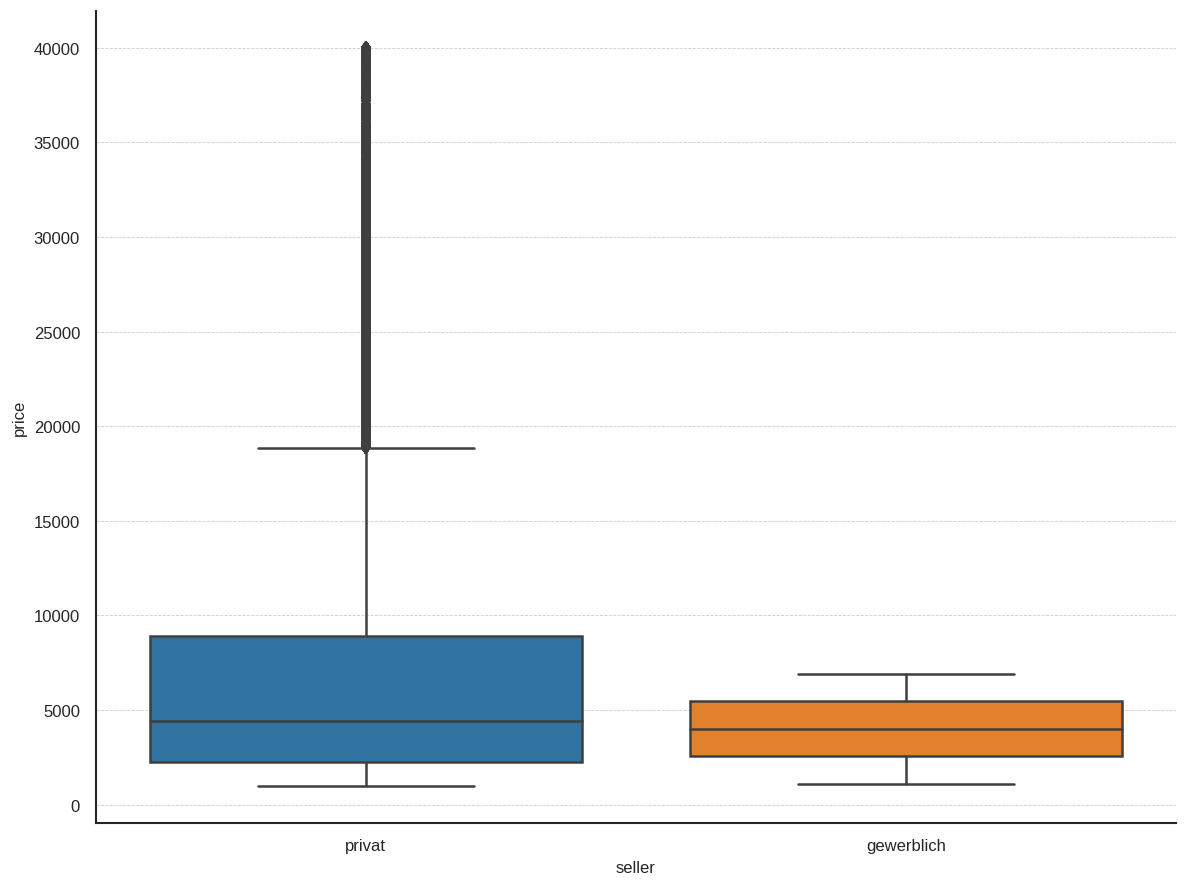

In [21]:
# Box plots

cols_ = [
    "vehicleType",
    "fuelType",
    "model",
    "gearbox",
    "brand",
    "monthOfRegistration",
    "yearOfRegistration",
    "abtest",
    "offerType",
    "seller",
]

for col in cols_:
    sns.boxplot(x = col, y = "price", data = cars_df)
    plt.savefig(f"../images/{col}_vs_price.png")
    plt.show()
